# <center> Sentiment Analysis </center>

___



<font color='blue'>
    
# 1. Import Data, Check data integrity.

# 2. Apply Basic Visualization

# 3. Text Pre-processing (EDA)
   - 1.	Apply Lower Case 
   - 2.	Define a function to perform basic steps like expanding contractions & Remove Accented Characters. (Using NFKD, NFKL, NFD).
   - 3.	Translate text to English
   - 4.	Spell Correction (will take a lot of time – do it only if you have a lot of time).
   - 5.	Check Integrity of Data (Check Junk Data)
   - 6.	Word Count.
        - a.	Check if words in a review are less and drop them.
   - 7.	Convert Dictionary to DF.
   - 8.	Remove first quartile values. (Less number of words will not give good prediction).
   - 9.	Stop words, stemming, tokenizing
        - a.	Using spacy
        - b.	Add customized stop words
        - c.	Use NLTK’s stemmer
        - d.	Tokenize
        - e.	Custom Stop words Removal
            - i.	Nlp.vocab[w].is_stop=False
        - f.	Stemming
   - 10.	Split the text into 4 columns (Data Sets)
   - 11.	Remove stop words from clean text datasets and run models.
   - 12.	Plot the Text again
        a.	Plot without stop words
        b.	Plot with stop words
        c.	Plot frequency (Word Cloud)
   - 13.	TF-IDF

# 4. Model Building
    - Clustering
    - SVD using scikitlearn
    
    ML Models
    - Logistic Regression
    - Linear SVC
    - Random Forest
    - XG Boost
    
    Deep Learning Models
    - LSTM
    - CNN + RNN (LSTM)
</font>

## <font color='blue'> 1. Import Data, Check data integrity. </font>


## Import Libraries

In [1]:
import numpy as np
import pandas as pd

import re
import requests
import matplotlib.pyplot as plt

import random
random.seed(123)

import time
import datetime

#ignore warnings
import warnings
warnings.filterwarnings('ignore')


#### Import English language into Spacy.

In [2]:
#!conda install -c conda-forge spacy
#!python -m spacy download en
#!pip install -U spacy
import spacy
nlp = spacy.load("en_core_web_sm")

## Bird's View of the Text analytics Activity

<img src='text_model_lifecycle.png'>

## Import the Data into dataframe

In [3]:
data = pd.read_csv('list.csv')

In [4]:
data.head(10)

,ReviewID,Reviewer Name,Review,Rating,Date-of-Review,Verified,SuperReviewer
0,41C3CF65-63CC-4F08-B3E6-8093172159A5,Katrina S,So much like the original!,5.0,2019-08-20T02:11:07.817Z,True,False
1,978205761,Josh S,It honored the legacy of the original.,5.0,2019-08-20T01:37:18.188Z,False,False
2,a6ff0e6b-3555-4b12-9880-b0655a115a1b,Nicole A,The movie was well done!,5.0,2019-08-20T01:32:34.005Z,True,False
3,7C974242-BDB7-45E8-878E-CDF5C2965132,Brent,I didn’t like the casting,3.0,2019-08-20T01:15:29.523Z,False,False
4,926ca101-0a29-4cdd-8e35-b0ec1f480980,katiedarkness U,I loved that it was so close to the original!,5.0,2019-08-20T01:08:55.965Z,True,False
5,dc2f8830-5a92-404c-a40d-1d3c5498c374,Jennifer G,The baby lions were the cutest!,5.0,2019-08-20T00:55:40.600Z,True,False
6,2913851B-F071-49BA-A33C-6BA0D40D1BF4,Lucy Pearle,"it wasn't awful, but felt it lacked the facial...",3.5,2019-08-20T00:45:08.567Z,True,False
7,d4f0830e-0c23-47e9-a391-6cb54da0c324,Monica,Loved how closely it mirrored the original Lio...,5.0,2019-08-20T00:37:17.179Z,True,False
8,978205695,Mike W,It's rare that I approve of remaking a classic...,4.0,2019-08-20T00:34:39.573Z,False,False
9,f60cc43b-b8f2-4269-9a20-170e63141171,Rob,It was very entertaining and I could share it ...,4.0,2019-08-20T00:04:25.219Z,True,False


#### Create a new column for finding Day of a week.

In [5]:
# Rename Date of review column.
data.rename(columns={'Date-of-Review':'date'}, inplace=True)

data['date'] = data['date'].astype('datetime64[ns]')

data['day']=data['date'].dt.day_name()

In [6]:
data.head(10)

,ReviewID,Reviewer Name,Review,Rating,date,Verified,SuperReviewer,day
0,41C3CF65-63CC-4F08-B3E6-8093172159A5,Katrina S,So much like the original!,5.0,2019-08-20 02:11:07.817,True,False,Tuesday
1,978205761,Josh S,It honored the legacy of the original.,5.0,2019-08-20 01:37:18.188,False,False,Tuesday
2,a6ff0e6b-3555-4b12-9880-b0655a115a1b,Nicole A,The movie was well done!,5.0,2019-08-20 01:32:34.005,True,False,Tuesday
3,7C974242-BDB7-45E8-878E-CDF5C2965132,Brent,I didn’t like the casting,3.0,2019-08-20 01:15:29.523,False,False,Tuesday
4,926ca101-0a29-4cdd-8e35-b0ec1f480980,katiedarkness U,I loved that it was so close to the original!,5.0,2019-08-20 01:08:55.965,True,False,Tuesday
5,dc2f8830-5a92-404c-a40d-1d3c5498c374,Jennifer G,The baby lions were the cutest!,5.0,2019-08-20 00:55:40.600,True,False,Tuesday
6,2913851B-F071-49BA-A33C-6BA0D40D1BF4,Lucy Pearle,"it wasn't awful, but felt it lacked the facial...",3.5,2019-08-20 00:45:08.567,True,False,Tuesday
7,d4f0830e-0c23-47e9-a391-6cb54da0c324,Monica,Loved how closely it mirrored the original Lio...,5.0,2019-08-20 00:37:17.179,True,False,Tuesday
8,978205695,Mike W,It's rare that I approve of remaking a classic...,4.0,2019-08-20 00:34:39.573,False,False,Tuesday
9,f60cc43b-b8f2-4269-9a20-170e63141171,Rob,It was very entertaining and I could share it ...,4.0,2019-08-20 00:04:25.219,True,False,Tuesday


In [7]:
#### Importing unseen data

In [8]:

unseen = pd.read_csv('unseen_test.csv')


In [9]:
unseen.head()

,ReviewID,review
0,92876,Was good. Nothing like the original but I beli...
1,92877,I absolutely loved it! A wonderful rendition o...
2,92878,I love the movie! Good job director! \nI appre...
3,92879,"GREAT MOVIE!! Same as the original, but the c..."
4,92880,Realistic. Fantastic special effects


In [10]:
unseen.shape

(1200, 2)

### Create Sentiment column, where 0 is positive reviews and 1 is negative reviews

In [11]:
data['Sentiment'] = np.where(data['Rating']>3, 0,1)

In [12]:
data.Sentiment.value_counts()

0    8029
1    2861
Name: Sentiment, dtype: int64

#### <font color='yellow'>  Insights of Data 
    1.) Sentiment is unbalanced. Logistic regression gave 59% accuracy.
    2.) So Selecting smart data (Balanced data), because SMOTE will be not yield good results with Text Data.
    </font>

#### Create new dataframe with required data. (new_data is the dataframe name)

In [13]:
# Create list of column names
colnames = ['ReviewID', 'Reviewer Name', 'Review', 'Rating', 'date', 'Verified', 'SuperReviewer', 'Sentiment']

In [14]:
# Take first 1500 rows of negative sentiment into a new Dataframe
new_data1 = data[data['Sentiment'] == 1].head(1500)
new_data1.head(10)

,ReviewID,Reviewer Name,Review,Rating,date,Verified,SuperReviewer,day,Sentiment
3,7C974242-BDB7-45E8-878E-CDF5C2965132,Brent,I didn’t like the casting,3.0,2019-08-20 01:15:29.523,False,False,Tuesday,1
10,448869182,NaN,The movie took the original mostly shot for sh...,1.5,2019-08-19 23:53:16.203,False,False,Monday,1
16,D4B86331-6E20-4E69-A708-0CB88EB096E6,movie fanatic,HORRIBLE. I knew I didn’t keep procrastinating...,1.0,2019-08-19 20:26:10.752,False,False,Monday,1
18,C44812D0-0A3F-4981-9EBC-1E8A12D2DA2D,Xavier,Animation was beautiful. Too beautiful. Hard t...,2.0,2019-08-19 19:24:53.066,True,False,Monday,1
19,978157736,Hei L,test2 how are you doing what are you doing hel...,2.5,2019-08-19 18:51:40.301,False,False,Monday,1
24,d12c1a8e-a4c7-4791-8af5-e1ce94c4ca28,Daniel D,"Great animation!, story line followed the orig...",3.0,2019-08-19 16:58:51.958,True,False,Monday,1
28,977756610,Lori M,It was good. Maybe not suited to little childr...,3.0,2019-08-19 14:56:46.412,False,False,Monday,1
32,c144eed4-a8b1-4e5c-ad37-caf6b22953e6,Jackie Kapocius,The original Lion King remains one of my favor...,2.5,2019-08-19 14:28:54.535,True,False,Monday,1
34,66007b3c-bd6c-45a9-8768-38bf20e86ec4,Ken A,They took most of the fun and all of the charm...,3.0,2019-08-19 14:27:00.230,True,False,Monday,1
40,978205108,John S,It's like watching National Geographic with ta...,2.0,2019-08-19 13:52:37.296,False,False,Monday,1


In [15]:
# Take first 1500 rows of positive sentiment into a new Dataframe
new_data2 = data[data['Sentiment'] == 0].head(1500)
new_data2.head(10)

,ReviewID,Reviewer Name,Review,Rating,date,Verified,SuperReviewer,day,Sentiment
0,41C3CF65-63CC-4F08-B3E6-8093172159A5,Katrina S,So much like the original!,5.0,2019-08-20 02:11:07.817,True,False,Tuesday,0
1,978205761,Josh S,It honored the legacy of the original.,5.0,2019-08-20 01:37:18.188,False,False,Tuesday,0
2,a6ff0e6b-3555-4b12-9880-b0655a115a1b,Nicole A,The movie was well done!,5.0,2019-08-20 01:32:34.005,True,False,Tuesday,0
4,926ca101-0a29-4cdd-8e35-b0ec1f480980,katiedarkness U,I loved that it was so close to the original!,5.0,2019-08-20 01:08:55.965,True,False,Tuesday,0
5,dc2f8830-5a92-404c-a40d-1d3c5498c374,Jennifer G,The baby lions were the cutest!,5.0,2019-08-20 00:55:40.600,True,False,Tuesday,0
6,2913851B-F071-49BA-A33C-6BA0D40D1BF4,Lucy Pearle,"it wasn't awful, but felt it lacked the facial...",3.5,2019-08-20 00:45:08.567,True,False,Tuesday,0
7,d4f0830e-0c23-47e9-a391-6cb54da0c324,Monica,Loved how closely it mirrored the original Lio...,5.0,2019-08-20 00:37:17.179,True,False,Tuesday,0
8,978205695,Mike W,It's rare that I approve of remaking a classic...,4.0,2019-08-20 00:34:39.573,False,False,Tuesday,0
9,f60cc43b-b8f2-4269-9a20-170e63141171,Rob,It was very entertaining and I could share it ...,4.0,2019-08-20 00:04:25.219,True,False,Tuesday,0
11,c7d6ae61-06fe-4dc2-9081-b71471092425,MH,Loved everything about this version with the e...,3.5,2019-08-19 21:42:08.283,False,False,Monday,0


In [16]:
# Merge (Concatenate) the 2 data frames
new_data = pd.concat([new_data1, new_data2])

In [17]:
new_data.head(10)

,ReviewID,Reviewer Name,Review,Rating,date,Verified,SuperReviewer,day,Sentiment
3,7C974242-BDB7-45E8-878E-CDF5C2965132,Brent,I didn’t like the casting,3.0,2019-08-20 01:15:29.523,False,False,Tuesday,1
10,448869182,NaN,The movie took the original mostly shot for sh...,1.5,2019-08-19 23:53:16.203,False,False,Monday,1
16,D4B86331-6E20-4E69-A708-0CB88EB096E6,movie fanatic,HORRIBLE. I knew I didn’t keep procrastinating...,1.0,2019-08-19 20:26:10.752,False,False,Monday,1
18,C44812D0-0A3F-4981-9EBC-1E8A12D2DA2D,Xavier,Animation was beautiful. Too beautiful. Hard t...,2.0,2019-08-19 19:24:53.066,True,False,Monday,1
19,978157736,Hei L,test2 how are you doing what are you doing hel...,2.5,2019-08-19 18:51:40.301,False,False,Monday,1
24,d12c1a8e-a4c7-4791-8af5-e1ce94c4ca28,Daniel D,"Great animation!, story line followed the orig...",3.0,2019-08-19 16:58:51.958,True,False,Monday,1
28,977756610,Lori M,It was good. Maybe not suited to little childr...,3.0,2019-08-19 14:56:46.412,False,False,Monday,1
32,c144eed4-a8b1-4e5c-ad37-caf6b22953e6,Jackie Kapocius,The original Lion King remains one of my favor...,2.5,2019-08-19 14:28:54.535,True,False,Monday,1
34,66007b3c-bd6c-45a9-8768-38bf20e86ec4,Ken A,They took most of the fun and all of the charm...,3.0,2019-08-19 14:27:00.230,True,False,Monday,1
40,978205108,John S,It's like watching National Geographic with ta...,2.0,2019-08-19 13:52:37.296,False,False,Monday,1


In [18]:
new_data.describe()

,Rating,Sentiment
count,3000.000000,3000.000000
mean,3.356167,0.500000
std,1.457373,0.500083
min,0.500000,0.000000
25%,2.500000,0.000000
50%,3.250000,0.500000
75%,5.000000,1.000000
max,5.000000,1.000000


In [19]:
print("Shape of the Data is: ",new_data.shape)
print("-----------------------------")
print("Top 4 rows of the data frame are: \n",new_data.head())
print("-----------------------------")
print("Column names are \n",new_data.columns)
print("-----------------------------")
print("Total Number of NAs in each column: \n",new_data.isna().sum())
print("-----------------------------")
print("The Data Types are: \n",new_data.dtypes)

Shape of the Data is:  (3000, 9)
-----------------------------
Top 4 rows of the data frame are: 
                                 ReviewID  Reviewer Name  \
3   7C974242-BDB7-45E8-878E-CDF5C2965132          Brent   
10                             448869182            NaN   
16  D4B86331-6E20-4E69-A708-0CB88EB096E6  movie fanatic   
18  C44812D0-0A3F-4981-9EBC-1E8A12D2DA2D         Xavier   
19                             978157736          Hei L   

                                               Review  Rating  \
3                           I didn’t like the casting     3.0   
10  The movie took the original mostly shot for sh...     1.5   
16  HORRIBLE. I knew I didn’t keep procrastinating...     1.0   
18  Animation was beautiful. Too beautiful. Hard t...     2.0   
19  test2 how are you doing what are you doing hel...     2.5   

                      date  Verified  SuperReviewer      day  Sentiment  
3  2019-08-20 01:15:29.523     False          False  Tuesday          1  
10 2019

#### Drop unnecessary dataframes from memory

In [20]:
del data
del new_data1
del new_data2

## <font color='blue'> 2. Visualizing the Data </font>

#### Install and load necessary libraries

In [21]:
#!pip install cufflinks

In [22]:
import cufflinks
pd.options.display.max_columns = 30
from IPython.core.interactiveshell import InteractiveShell
import plotly
import plotly.figure_factory as ff
InteractiveShell.ast_node_interactivity = 'all'
from plotly.offline import iplot
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')

In [23]:
plotly.offline.offline.__PLOTLY_OFFLINE_INITIALIZED = True

In [24]:
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook
output_notebook()

Loading BokehJS ...

jupyter notebook --NotebookApp.iopub_data_rate_limit=1.0e10

In [25]:
import plotly.io as pio
pio.renderers.default = 'iframe' # or 'notebook' or 'colab' or 'jupyterlab'

In [26]:
new_data['Rating'].iplot(
    kind='hist',
    xTitle='rating',
    linecolor='black',
    yTitle='count',
    title='Review Rating Distribution')

In [27]:
new_data['day'].iplot(
    kind='hist',
    bins=100,
    xTitle='Days of a week',
    linecolor='black',
    yTitle='count',
    title='Days Distribution')

In [28]:
new_data['SuperReviewer'].iplot(
    kind='hist',
    bins=100,
    xTitle='Super Reviewer',
    linecolor='black',
    yTitle='count',
    title='Super Reviewer Distribution')

In [29]:
new_data['Verified'].iplot(
    kind='hist',
    bins=100,
    xTitle='Verified User',
    linecolor='black',
    yTitle='count',
    title='Verified user Distribution')

In [30]:
new_data.groupby('Rating').count()['day'].iplot(kind='bar',
                                               yTitle='Days', linecolor='blue', opacity=0.8,
                                               title='Bar Chart of Rating', xTitle='Day of the week')

In [31]:
new_data[new_data.Sentiment == 1].day.value_counts(normalize=False)

Monday       330
Sunday       313
Tuesday      222
Wednesday    192
Thursday     168
Saturday     142
Friday       133
Name: day, dtype: int64

In [32]:
new_data[new_data.Sentiment == 0].day.value_counts()

Monday       312
Tuesday      287
Thursday     236
Wednesday    218
Sunday       160
Saturday     147
Friday       140
Name: day, dtype: int64

In [33]:
new_data[new_data.Verified == True].day.value_counts()

Monday       443
Tuesday      367
Thursday     296
Sunday       277
Wednesday    266
Friday       182
Saturday     172
Name: day, dtype: int64

In [34]:
new_data[new_data.Verified == False].day.value_counts()

Monday       199
Sunday       196
Wednesday    144
Tuesday      142
Saturday     117
Thursday     108
Friday        91
Name: day, dtype: int64

### <font color='yellow'> Visualization Insights </font>
    1.  Super Reviewer has 2 categories and only very few data points in one of them, so it might not be a good predictor
    2.  Many reviews are give on Monday, and next highest on Sunday. 
        - So, movie viewing could be high on Saturday and Sunday, and people might have written reviews on Sunday and Monday. 
        - So, movie producers could get more profits, if the movie is casted in more theaters on weekends.
        - 5 ratings are more than any other rating, 2nd best rating is 3. So many viewers are satisfied with the movie.

#### Check if text column has null values (i,e no text)

In [35]:

print(new_data[new_data['Review'] == ""])

Empty DataFrame
Columns: [ReviewID, Reviewer Name, Review, Rating, date, Verified, SuperReviewer, day, Sentiment]
Index: []


In [36]:
# Checking null values for unseen data
print(unseen[unseen['review'] == ""])

Empty DataFrame
Columns: [ReviewID, review]
Index: []


In [37]:
new_data.head(6)

,ReviewID,Reviewer Name,Review,Rating,date,Verified,SuperReviewer,day,Sentiment
3,7C974242-BDB7-45E8-878E-CDF5C2965132,Brent,I didn’t like the casting,3.0,2019-08-20 01:15:29.523,False,False,Tuesday,1
10,448869182,NaN,The movie took the original mostly shot for sh...,1.5,2019-08-19 23:53:16.203,False,False,Monday,1
16,D4B86331-6E20-4E69-A708-0CB88EB096E6,movie fanatic,HORRIBLE. I knew I didn’t keep procrastinating...,1.0,2019-08-19 20:26:10.752,False,False,Monday,1
18,C44812D0-0A3F-4981-9EBC-1E8A12D2DA2D,Xavier,Animation was beautiful. Too beautiful. Hard t...,2.0,2019-08-19 19:24:53.066,True,False,Monday,1
19,978157736,Hei L,test2 how are you doing what are you doing hel...,2.5,2019-08-19 18:51:40.301,False,False,Monday,1
24,d12c1a8e-a4c7-4791-8af5-e1ce94c4ca28,Daniel D,"Great animation!, story line followed the orig...",3.0,2019-08-19 16:58:51.958,True,False,Monday,1


In [38]:
new_data.nunique()

ReviewID         3000
Reviewer Name    2461
Review           2993
Rating             10
date             3000
Verified            2
SuperReviewer       2
day                 7
Sentiment           2
dtype: int64

In [39]:
unseen.nunique()

ReviewID    1200
review      1199
dtype: int64

In [40]:
print("Rating Counts: \n",new_data.Rating.value_counts())
print("-----------------------------")
print("Verified User Counts: \n",new_data.Verified.value_counts())
print("-----------------------------")
#print("Super Reviewer Counts: \n",new_data.SuperReviewer.value_counts())
#print("-----------------------------")
print("Sentiment Counts: \n",new_data.Sentiment.value_counts())

Rating Counts: 
 5.0    935
3.0    516
4.0    302
2.0    295
2.5    238
0.5    182
1.0    171
3.5    140
4.5    123
1.5     98
Name: Rating, dtype: int64
-----------------------------
Verified User Counts: 
 True     2003
False     997
Name: Verified, dtype: int64
-----------------------------
Sentiment Counts: 
 1    1500
0    1500
Name: Sentiment, dtype: int64


### Drop unnecessary Columns 

In [41]:
#new_data = new_data.drop(['SuperReviewer', 'Reviewer Name', 'ReviewID'], axis = 1)

# 3. Text Pre-processing

In [42]:
#Duplicating the original text extracted before proceeeding with preprocessing steps

import copy
print(type(new_data['Review']))
original_data = copy.deepcopy(new_data)
print(new_data.keys())
print(original_data.keys())

<class 'pandas.core.series.Series'>
Index(['ReviewID', 'Reviewer Name', 'Review', 'Rating', 'date', 'Verified',
       'SuperReviewer', 'day', 'Sentiment'],
      dtype='object')
Index(['ReviewID', 'Reviewer Name', 'Review', 'Rating', 'date', 'Verified',
       'SuperReviewer', 'day', 'Sentiment'],
      dtype='object')


In [43]:
print(type(unseen['review']))
original_unseen_data = copy.deepcopy(unseen)
print(unseen.keys())
print(original_unseen_data.keys())

<class 'pandas.core.series.Series'>
Index(['ReviewID', 'review'], dtype='object')
Index(['ReviewID', 'review'], dtype='object')


### Basic cleaning of text

### LowerCase all text

In [44]:
new_data['Review'] = [text.strip().lower() for text in new_data['Review']]
new_data['Review'][:10]

3                             i didn’t like the casting
10    the movie took the original mostly shot for sh...
16    horrible. i knew i didn’t keep procrastinating...
18    animation was beautiful. too beautiful. hard t...
19    test2 how are you doing what are you doing hel...
24    great animation!, story line followed the orig...
28    it was good. maybe not suited to little childr...
32    the original lion king remains one of my favor...
34    they took most of the fun and all of the charm...
40    it's like watching national geographic with ta...
Name: Review, dtype: object

#### Applying same steps on validation data (Unseen Data)

In [45]:
unseen['review'] = [text.strip().lower() for text in unseen['review']]
unseen['review'][:10]

0    was good. nothing like the original but i beli...
1    i absolutely loved it! a wonderful rendition o...
2    i love the movie! good job director! \ni appre...
3    great movie!!  same as the original, but the c...
4               realistic.   fantastic special effects
5                     almost exactly like the original
6                    visually stunning, beautiful film
7    did not care for beyonce as the voice of nala....
8     thought it was a good movie overall i enjoyed it
9    we loved every second of the lion king. i even...
Name: review, dtype: object

#### Defining the functions to perform basic steps like expanding contractions and remove accented characters

In [46]:
from contractions import CONTRACTION_MAP
import unicodedata

def expand_contractions(text, contraction_mapping=CONTRACTION_MAP):
    
    contractions_pattern = re.compile('({})'.format('|'.join(contraction_mapping.keys())), 
                                      flags=re.IGNORECASE|re.DOTALL)
    def expand_match(contraction):
        print(contraction)
        print(type(contraction))
        match = contraction.group(0)
        print(match)
        first_char = match[0]
        print(first_char)
        expanded_contraction = contraction_mapping.get(match)\
                                if contraction_mapping.get(match)\
                                else contraction_mapping.get(match.lower())                       
        expanded_contraction = first_char+expanded_contraction[1:]
        return expanded_contraction
        
    print(f"The expand match is {expand_match} and text is {text}")
    expanded_text = contractions_pattern.sub(expand_match, text)
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text

def remove_accented_chars(text):
    # Encode the data in Ascii format, ignore if there are any errors, Decode the data in UTF-8 Format.
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    #https://docs.python.org/2/library/unicodedata.html
    return text

In [47]:
def scrub_words(text):
    #Replace \xao characters in text
    text = re.sub('\xa0', ' ', text)
    
    #Replace non ascii / not words and digits
    text = re.sub("(\\W|\\d)",' ',text)
    
    #Replace new line characters and following text untill space
    text = re.sub('\n(\w*?)[\s]', '', text)
    
    #Remove html markup
    text = re.sub("<.*?>", ' ', text)
    return text

In [48]:
new_data['Review'][:5]

3                             i didn’t like the casting
10    the movie took the original mostly shot for sh...
16    horrible. i knew i didn’t keep procrastinating...
18    animation was beautiful. too beautiful. hard t...
19    test2 how are you doing what are you doing hel...
Name: Review, dtype: object

#### Invoking the above defined functions

In [49]:
new_data['Review'] = [expand_contractions(re.sub('’', "'", text)) for text in new_data['Review']]
new_data['Review'] = [remove_accented_chars(text) for text in new_data['Review']]

The expand match is <function expand_contractions.<locals>.expand_match at 0x7f97dbc94310> and text is i didn't like the casting
<re.Match object; span=(2, 8), match="didn't">
<class 're.Match'>
didn't
d
The expand match is <function expand_contractions.<locals>.expand_match at 0x7f97dbc94310> and text is the movie took the original mostly shot for shot, but removed almost all of the soul of the original. laughs were nowhere to be heard, and it did not make me get the urge to start wanting to sing along
The expand match is <function expand_contractions.<locals>.expand_match at 0x7f97dbc94310> and text is horrible. i knew i didn't keep procrastinating watching this movie 4 times for nothing. it took for me to get tipsy to finally watch it. the cinematics was the only positive thing about this movie. the mouth movements of the animals were nowhere near matching what they were saying, which is a major key in my opinion, that counted for about 80% of what made the movie bad to me. the seco

#### Invoking above functions on Unseen Data

In [50]:

unseen['review'] = [expand_contractions(re.sub('’', "'", text)) for text in unseen['review']]
unseen['review'] = [remove_accented_chars(text) for text in unseen['review']]

The expand match is <function expand_contractions.<locals>.expand_match at 0x7f97dbc87c10> and text is was good. nothing like the original but i believe that was the point.
The expand match is <function expand_contractions.<locals>.expand_match at 0x7f97dbc87c10> and text is i absolutely loved it! a wonderful rendition of the original. just dont compare to the cartoon version. let this movie be its own and you will like it
The expand match is <function expand_contractions.<locals>.expand_match at 0x7f97dbc87c10> and text is i love the movie! good job director! 
i appreciate all the work some great people have put in for years.
The expand match is <function expand_contractions.<locals>.expand_match at 0x7f97dbc87c10> and text is great movie!!  same as the original, but the cinematography made a huge difference!!
The expand match is <function expand_contractions.<locals>.expand_match at 0x7f97dbc87c10> and text is realistic.   fantastic special effects
The expand match is <function expan

In [51]:
new_data['Review'] = [scrub_words(text) for text in new_data['Review']]

In [52]:
new_data['Review'][:5]

3                            i did not like the casting
10    the movie took the original mostly shot for sh...
16    horrible  i knew i did not keep procrastinatin...
18    animation was beautiful  too beautiful  hard t...
19    test  how are you doing what are you doing hel...
Name: Review, dtype: object

In [53]:
type(new_data['Review'][0])

str

In [54]:
## Scrub words on Unseen
unseen['review'] = [scrub_words(text) for text in unseen['review']]
unseen['review'][:5]

0    was good  nothing like the original but i beli...
1    i absolutely loved it  a wonderful rendition o...
2    i love the movie  good job director   i apprec...
3    great movie    same as the original  but the c...
4               realistic    fantastic special effects
Name: review, dtype: object

#### Spell Correction

In [55]:
## Using TextBlob to spell correct 

import textblob
from textblob import TextBlob

new_data['Review'] = [TextBlob(text).correct() for text in new_data['Review']]

In [56]:
type(new_data['Review'][0])

textblob.blob.TextBlob

In [57]:
## Converting textblob to string.
new_data['Review'] = [str(text) for text in new_data['Review']]

In [58]:
type(new_data['Review'][0])

str

In [59]:
## Spell correction on Unseen
unseen['review'] = [TextBlob(text).correct() for text in unseen['review']]


In [60]:
## Converting textblob to string.
unseen['review'] = [str(text) for text in unseen['review']]

In [61]:
type(unseen['review'][0])

str

In [62]:
## Translate Other Languages to English
#new_data['Review'] = [TextBlob(text).translate(to= 'en') for text in new_data['Review']]

### Checking the integrity of the data after initial preprocessing steps

In [63]:
print(type(new_data['Review']))
print(type(original_data['Review']))

print(len(new_data['Review']))
print(len(original_data['Review']))

print(new_data['Review'][0])
print("..................")
print(original_data['Review'][0])

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
3000
3000
so much like the original 
..................
So much like the original!


In [64]:
## Checking integrity of unseen data
print(type(unseen['review']))
print(type(original_unseen_data['review']))

print(len(unseen['review']))
print(len(original_unseen_data['review']))

print(unseen['review'][0])
print("..................")
print(original_unseen_data['review'][0])


<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
1200
1200
was good  nothing like the original but i believe that was the point 
..................
Was good. Nothing like the original but I believe that was the point.


#### Adding new column "word_count" which specifies the number of tokens in each document

In [65]:
new_data['word_count'] = [len(text.split(' ')) for text in new_data['Review']]

In [66]:
pd.DataFrame(new_data['word_count']).describe()

,word_count
count,3000.000000
mean,36.187667
std,53.864771
min,2.000000
25%,11.000000
50%,20.000000
75%,39.000000
max,891.000000


In [67]:
new_data['word_count'].iplot(
    kind='hist',
    bins=100,
    xTitle='Word Count',
    linecolor='black',
    yTitle='count',
    title='Review Text Word Count Distribution')

In [68]:
unseen['word_count'] = [len(text.split(' ')) for text in unseen['review']]

In [69]:
unseen['word_count'].iplot(
    kind='hist',
    bins=100,
    xTitle='Word Count',
    linecolor='black',
    yTitle='count',
    title='Review Text Word Count Distribution')

In [70]:
print(f"The total words in the 1000th blog is {new_data['word_count'][1000]}")
print(f"The 1000th blog is {new_data['Review'][1000]}")

The total words in the 1000th blog is 13
The 1000th blog is loved it   loved that they did not mess up a classic


#### Converting the dictionary to Dataframe 

Converting dictionary to dataframe as pandas provide better and readable subsetting options

In [71]:
new_data.keys()

Index(['ReviewID', 'Reviewer Name', 'Review', 'Rating', 'date', 'Verified',
       'SuperReviewer', 'day', 'Sentiment', 'word_count'],
      dtype='object')

In [72]:
unseen.keys()

Index(['ReviewID', 'review', 'word_count'], dtype='object')

In [73]:
blogs_df = pd.DataFrame(new_data)

In [74]:
blogs_df.shape

(3000, 10)

In [75]:
ublogs_df = pd.DataFrame(unseen)
ublogs_df.shape

(1200, 3)

In [76]:
blogs_df.head(5)

,ReviewID,Reviewer Name,Review,Rating,date,Verified,SuperReviewer,day,Sentiment,word_count
3,7C974242-BDB7-45E8-878E-CDF5C2965132,Brent,i did not like the casting,3.0,2019-08-20 01:15:29.523,False,False,Tuesday,1,6
10,448869182,NaN,the movie took the original mostly shot for sh...,1.5,2019-08-19 23:53:16.203,False,False,Monday,1,43
16,D4B86331-6E20-4E69-A708-0CB88EB096E6,movie fanatic,horrible i knew i did not keep procrastinatin...,1.0,2019-08-19 20:26:10.752,False,False,Monday,1,176
18,C44812D0-0A3F-4981-9EBC-1E8A12D2DA2D,Xavier,animation was beautiful too beautiful hard t...,2.0,2019-08-19 19:24:53.066,True,False,Monday,1,30
19,978157736,Hei L,test how are you doing what are you doing hel...,2.5,2019-08-19 18:51:40.301,False,False,Monday,1,14


In [77]:
blogs_df['word_count'].iplot(
    kind='hist',
    bins=100,
    xTitle='Word Count',
    linecolor='black',
    yTitle='count',
    title='Review Text Word Count Distribution of Unseen Data')

#### Removing all the blogs with words_count value less than first quartile (25%) of words_count attribute

#### <font color='Yellow'> Insight from removing the data </font>
    Dropping the data gave terrible results. So, kept all the data.
    

#### Converting dataframe back to dictionary

In [78]:
# Convert data to dictionary
data = blogs_df.reset_index().to_dict(orient='list')

In [79]:
print(f"The keys in the dictionary are {data.keys()}")

The keys in the dictionary are dict_keys(['index', 'ReviewID', 'Reviewer Name', 'Review', 'Rating', 'date', 'Verified', 'SuperReviewer', 'day', 'Sentiment', 'word_count'])


In [80]:
print(data['Review'][5])

great animation   story line followed the original  so if you have seen it before the excitement is less 


In [81]:
type(data['Review'])

list

In [82]:
# Convert unseen data to di tionary
unseen_data = ublogs_df.reset_index().to_dict(orient='list')
type(unseen_data['review'])

list

## Stopwords, stemming, and tokenizing

In [83]:
## load spacy's English stopwords as variable called 'stopwords'

stopwords = spacy.lang.en.stop_words.STOP_WORDS
print('Number of stop words: %d' % len(stopwords))
print('First ten stop words: %s' % list(stopwords)[:10])
#stopwords.remove('no')
#stopwords.remove('not')

Number of stop words: 326
First ten stop words: ['by', 'further', 'have', 'within', 'up', 'nobody', 'six', 'twenty', 'his', 'either']


In [84]:
## Adding Custom stopwords to the spacy stopword list
customize_stop_words = []
#customize_stop_words = ['original', 'movie']
#customize_stop_words = ['one', 'two', 'three', 'four', 'five']
for w in customize_stop_words:
    nlp.vocab[w].is_stop = True

#### <font color='yellow'> Stop Words Insight </font>
Adding custom stop words gave bad results. So, removed the custom stop words.

In [85]:
## It might be surprising, but spaCy doesn't contain any function for stemming as it relies on lemmatization only. 
## Therefore, in this section, we will use NLTK for stemming.

## load nltk's SnowballStemmer as variable 'stemmer'
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

In [86]:
# Here I define a tokenizer and stemmer which returns the set of stems (excluding stop words) in the text that it is passed

def tokenize_and_stem(doc, remove_stopwords = True):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    if remove_stopwords:
        tokens = [word.text for word in doc if not word.is_stop]
    else:
        tokens = [word.text for word in doc]
        
    #print(tokens[:5])
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    
    #print("ended re.search")
    stems = [stemmer.stem(t) for t in filtered_tokens]
    #print("returning stems")
    return stems

def tokenize_and_lemmatize(doc, remove_stopwords = True):
    
    # spaCy will convert word to lower case and changing past tense, 
    # gerund form (other tenses as well) to present tense. Also, “they” normalize to “-PRON-” which is pronoun.

    if remove_stopwords:
        tokens = [word for word in doc if not word.is_stop]
    else:
        tokens = [word for word in doc]
    #print("Completed tokenization")
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token.text):
            filtered_tokens.append(token)
            
    #print("ended re.search")
    lemma = [t.lemma_ for t in filtered_tokens]
    #print("returning stems")
    return lemma


def tokenize_only(doc, remove_stopwords = True):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    if remove_stopwords:
        tokens = [word.text for word in doc if not word.is_stop]
    else:
        tokens = [word.text for word in doc]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens

In [87]:
# Just checking the type of the data
print(type(unseen))
print(type(data))

<class 'pandas.core.frame.DataFrame'>
<class 'dict'>


In [88]:
## We are trying to create four seperate lists for text with stop words, text without stop words,
## text with stemmed words and text with lemmatized words.

## Naming Conventions followed ####

## 'clean' word is appended to lists which do not contain stopwords

## 'all' keyword is appended to lists which contain stopwords.

## use extend so it's a big flat list of vocab

data['clean_text_stemmed'] = []
data['clean_text_lemmatized'] = []
data['text_stemmed'] = []
data['text_lemmatized'] = []

vocab_stemmed = []

vocab_tokenized = []
allvocab_tokenized = []

vocab_lemmatized = []
allvocab_lemmatized = []


for idx,text in enumerate(data['Review']):

## first convert the entire text into spacy document type
#     print(f"The type of text is {type(text)} and text is {text}")
#     print(f"The type of idx is {type(idx)} and idx is {idx}")
    doc = nlp(text)
    print(f"processing {idx} document")
    words_stemmed = tokenize_and_stem(doc)
    words_lemmatized = tokenize_and_lemmatize(doc)
    vocab_stemmed.extend(words_stemmed)
    vocab_lemmatized.extend(words_lemmatized)
    
    data['clean_text_stemmed'].append(words_stemmed)
    data['clean_text_lemmatized'].append(words_lemmatized)
    
    allwords_stemmed = tokenize_and_stem(doc, False) 
    allwords_lemmatized = tokenize_and_lemmatize(doc, False)
    allvocab_lemmatized.extend(allwords_lemmatized)
    
    data['text_stemmed'].append(allwords_stemmed)
    data['text_lemmatized'].append(allwords_lemmatized)
    
    allwords_tokenized = tokenize_only(doc,False)
    allvocab_tokenized.extend(allwords_tokenized)
    
    words_tokenized = tokenize_only(doc)
    vocab_tokenized.extend(words_tokenized)

processing 0 document
processing 1 document
processing 2 document
processing 3 document
processing 4 document
processing 5 document
processing 6 document
processing 7 document
processing 8 document
processing 9 document
processing 10 document
processing 11 document
processing 12 document
processing 13 document
processing 14 document
processing 15 document
processing 16 document
processing 17 document
processing 18 document
processing 19 document
processing 20 document
processing 21 document
processing 22 document
processing 23 document
processing 24 document
processing 25 document
processing 26 document
processing 27 document
processing 28 document
processing 29 document
processing 30 document
processing 31 document
processing 32 document
processing 33 document
processing 34 document
processing 35 document
processing 36 document
processing 37 document
processing 38 document
processing 39 document
processing 40 document
processing 41 document
processing 42 document
processing 43 documen

In [89]:
print(type(data['Review']))
print(type(data['clean_text_stemmed']))

print(len(data['Review']))
print(len(data['clean_text_stemmed']))

print("\n")
print(data['Review'][1])
print("\n clean_text_stemmed \n")
print(data['clean_text_stemmed'][1])
print("\n clean_text_lemmatized \n")
print(data['clean_text_lemmatized'][1])

<class 'list'>
<class 'list'>
3000
3000


the movie took the original mostly shot for shot  but removed almost all of the soul of the original  laughs were nowhere to be heard  and it did not make me get the urge to start wanting to sing along

 clean_text_stemmed 

['movi', 'took', 'origin', 'shot', 'shot', 'remov', 'soul', 'origin', 'laugh', 'heard', 'urg', 'start', 'want', 'sing']

 clean_text_lemmatized 

['movie', 'take', 'original', 'shoot', 'shot', 'remove', 'soul', 'original', 'laugh', 'hear', 'urge', 'start', 'want', 'sing']


In [90]:
# unseen['review']

unseen_data['clean_text_stemmed'] = []
unseen_data['clean_text_lemmatized'] = []
unseen_data['text_stemmed'] = []
unseen_data['text_lemmatized'] = []

unseen_vocab_stemmed = []

unseen_vocab_tokenized = []
unseen_allvocab_tokenized = []

unseen_vocab_lemmatized = []
unseen_allvocab_lemmatized = []


for idx,text in enumerate(unseen_data['review']):

## first convert the entire text into spacy document type
#     print(f"The type of text is {type(text)} and text is {text}")
#     print(f"The type of idx is {type(idx)} and idx is {idx}")
    unseen_doc = nlp(text)
    print(f"processing {idx} document")
    unseen_words_stemmed = tokenize_and_stem(unseen_doc)
    unseen_words_lemmatized = tokenize_and_lemmatize(unseen_doc)
    unseen_vocab_stemmed.extend(unseen_words_stemmed)
    unseen_vocab_lemmatized.extend(unseen_words_lemmatized)
    
    unseen_data['clean_text_stemmed'].append(unseen_words_stemmed)
    unseen_data['clean_text_lemmatized'].append(unseen_words_lemmatized)
    
    unseen_allwords_stemmed = tokenize_and_stem(unseen_doc, False) 
    unseen_allwords_lemmatized = tokenize_and_lemmatize(unseen_doc, False)
    unseen_allvocab_lemmatized.extend(unseen_allwords_lemmatized)
    
    unseen_data['text_stemmed'].append(unseen_allwords_stemmed)
    unseen_data['text_lemmatized'].append(unseen_allwords_lemmatized)
    
    unseen_allwords_tokenized = tokenize_only(unseen_doc,False)
    unseen_allvocab_tokenized.extend(unseen_allwords_tokenized)
    
    unseen_words_tokenized = tokenize_only(unseen_doc)
    unseen_vocab_tokenized.extend(unseen_words_tokenized)

processing 0 document
processing 1 document
processing 2 document
processing 3 document
processing 4 document
processing 5 document
processing 6 document
processing 7 document
processing 8 document
processing 9 document
processing 10 document
processing 11 document
processing 12 document
processing 13 document
processing 14 document
processing 15 document
processing 16 document
processing 17 document
processing 18 document
processing 19 document
processing 20 document
processing 21 document
processing 22 document
processing 23 document
processing 24 document
processing 25 document
processing 26 document
processing 27 document
processing 28 document
processing 29 document
processing 30 document
processing 31 document
processing 32 document
processing 33 document
processing 34 document
processing 35 document
processing 36 document
processing 37 document
processing 38 document
processing 39 document
processing 40 document
processing 41 document
processing 42 document
processing 43 documen

In [91]:
# Checking vocabulary count in various data sets
all_vocab_frame = pd.DataFrame({'words': allvocab_tokenized}, index = allvocab_lemmatized)
print ('there are ' + str(all_vocab_frame.shape[0]) + ' items in all_vocab_frame')

vocab_frame = pd.DataFrame({'words': vocab_tokenized}, index = vocab_lemmatized)
print ('there are ' + str(vocab_frame.shape[0]) + ' items in vocab_frame')

there are 93360 items in all_vocab_frame
there are 40148 items in vocab_frame


In [92]:
print (vocab_frame.head(20))

                           words
like                        like
casting                  casting
movie                      movie
take                        took
original                original
shoot                       shot
shot                        shot
remove                   removed
soul                        soul
original                original
laugh                     laughs
hear                       heard
urge                        urge
start                      start
want                     wanting
sing                        sing
horrible                horrible
know                        knew
procrastinating  procrastinating
watch                   watching


### Plotting Most frequent words before and after stopword removal

In [93]:
values, counts = np.unique(vocab_frame, return_counts=True)
all_values, all_counts = np.unique(all_vocab_frame, return_counts=True)

In [94]:
sorted_indices = np.argsort(-counts)
print(sorted_indices)
all_sorted_indices = np.argsort(-all_counts)
print(all_sorted_indices)

[2475 2640 2216 ...  883  889 4315]
[4063 2162  177 ... 2768 2771 4579]


In [95]:
values = values[sorted_indices]
counts = counts[sorted_indices]

all_values = all_values[all_sorted_indices]
all_counts = all_counts[all_sorted_indices]

#### Frequency plot of words in blogs with stopwords removed

<BarContainer object of 75 artists>

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


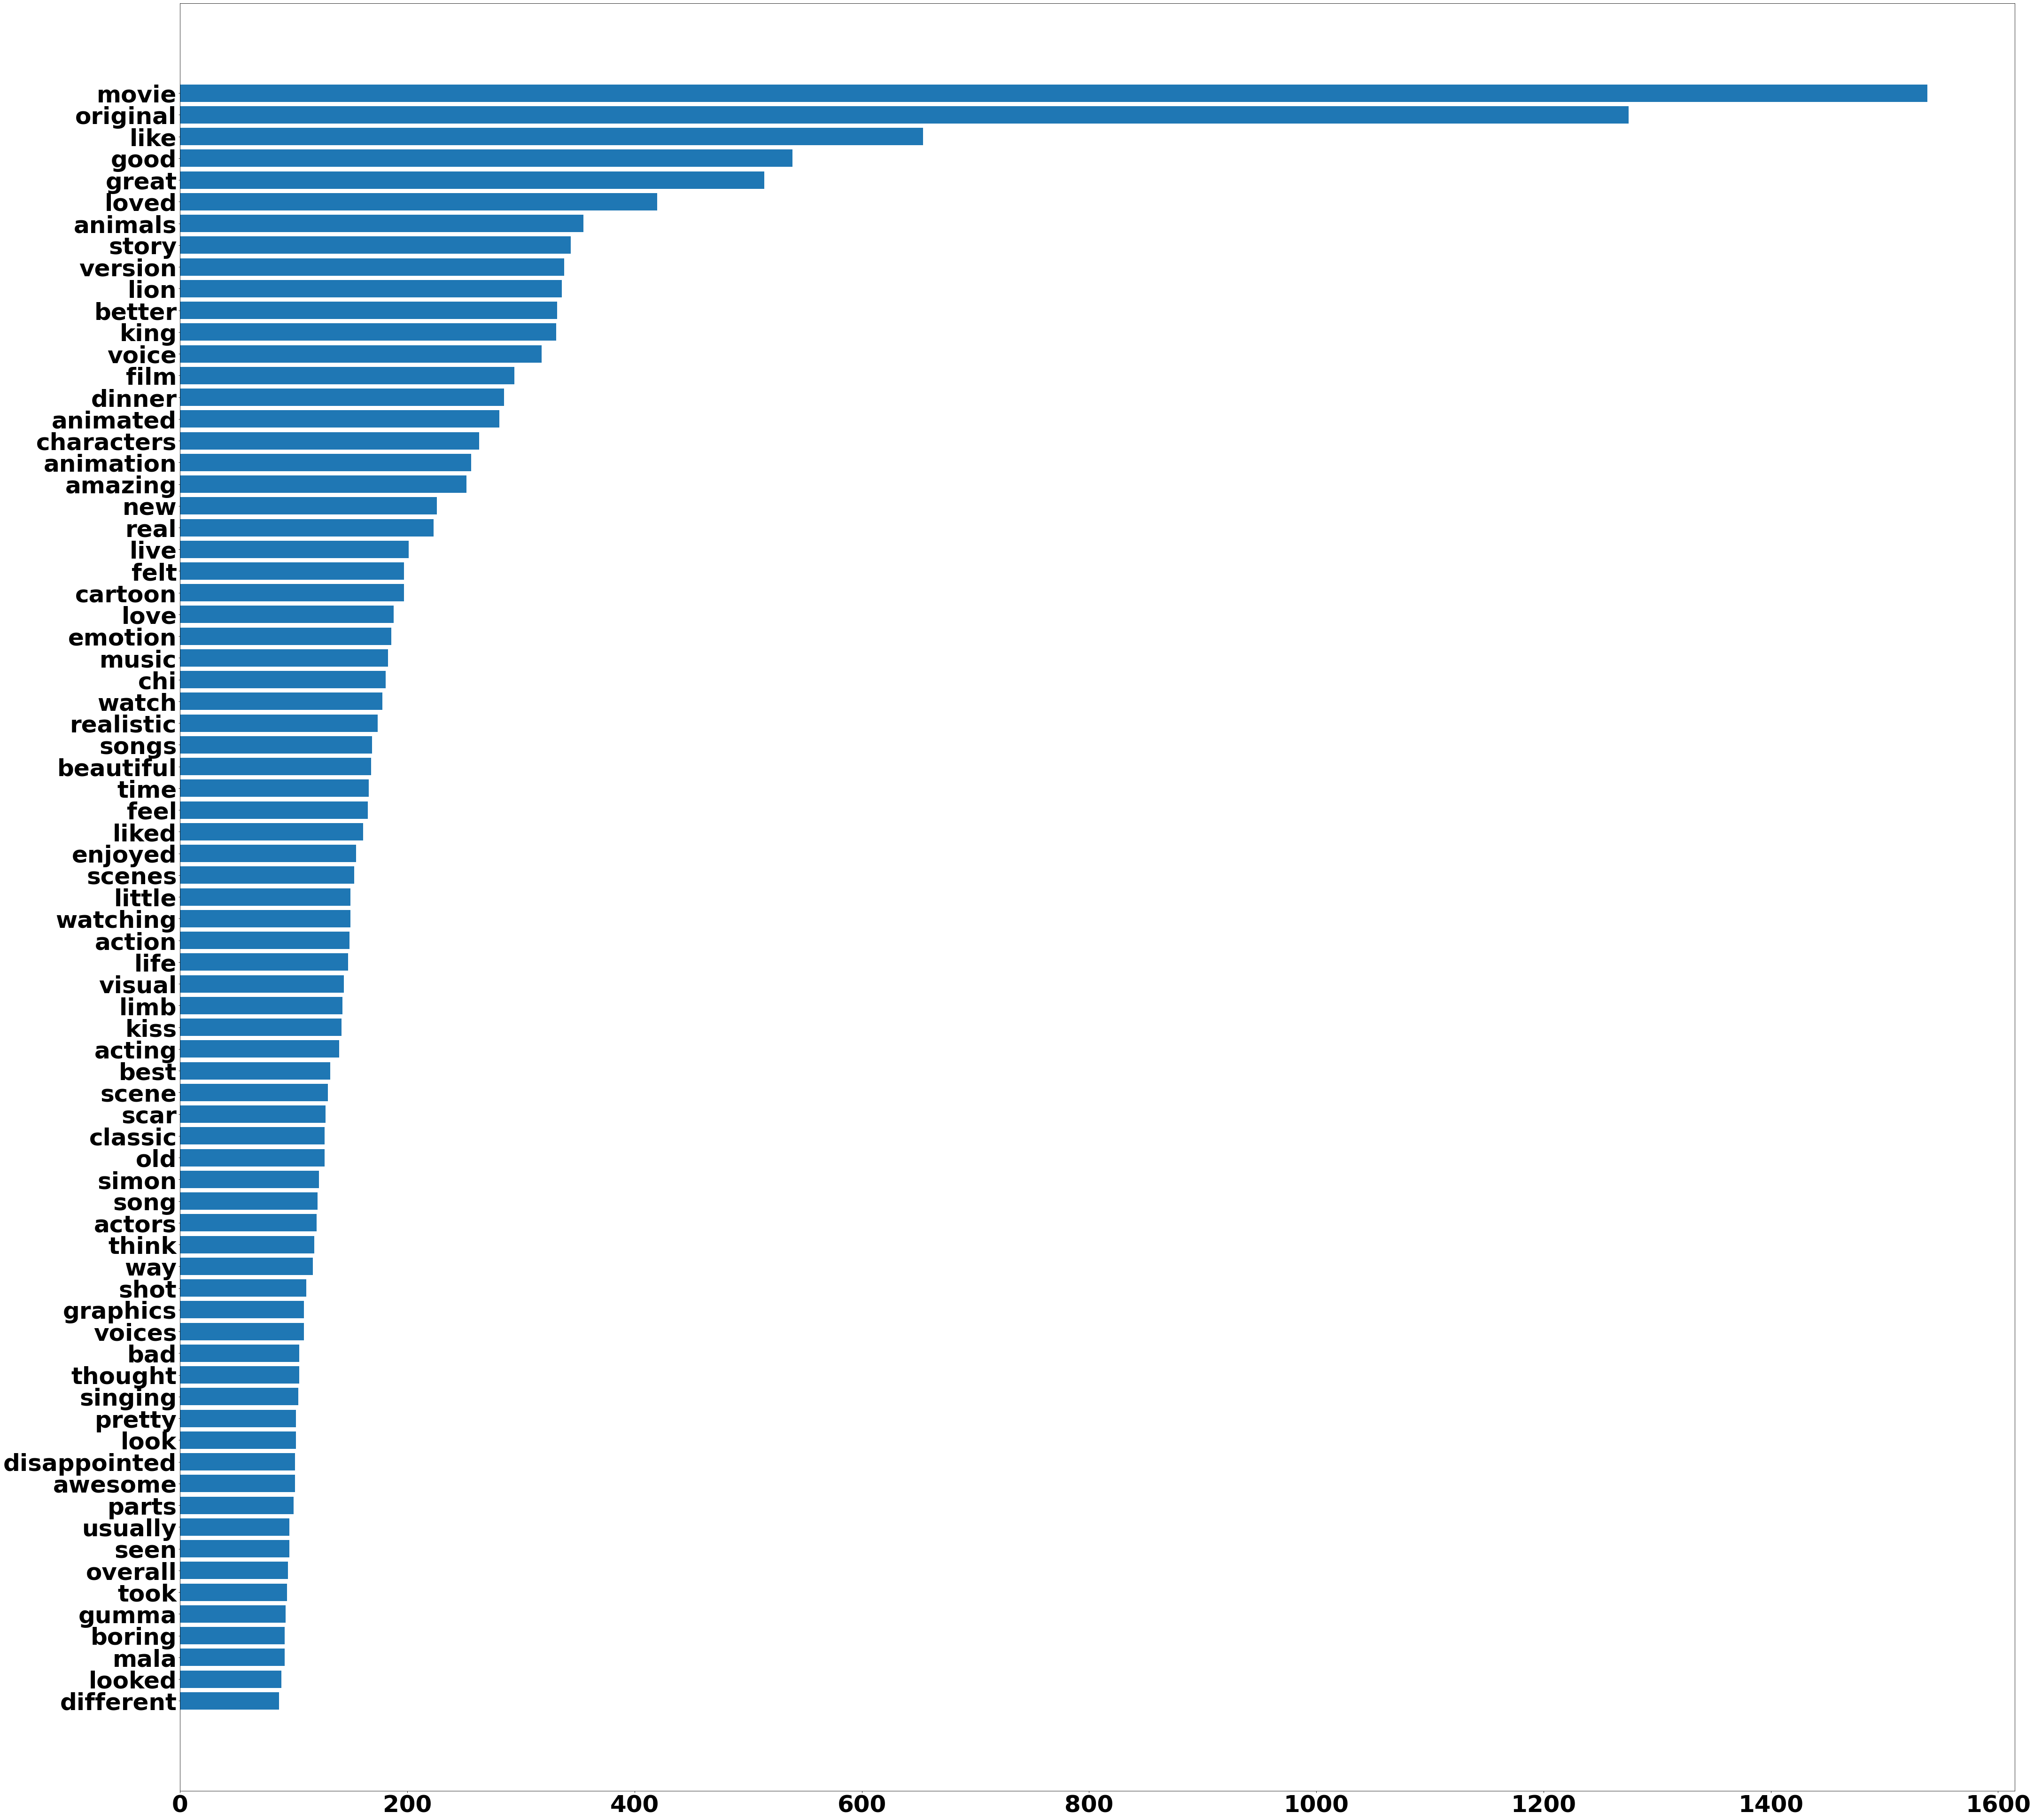

In [96]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 50}

plt.rc('font', **font)
fig = plt.figure(figsize=(70,70))
plt.barh(values[:75], counts[:75])
plt.gca().invert_yaxis()
plt.show()

#### Frequency plot of words in blogs with stopwords retained

<BarContainer object of 75 artists>

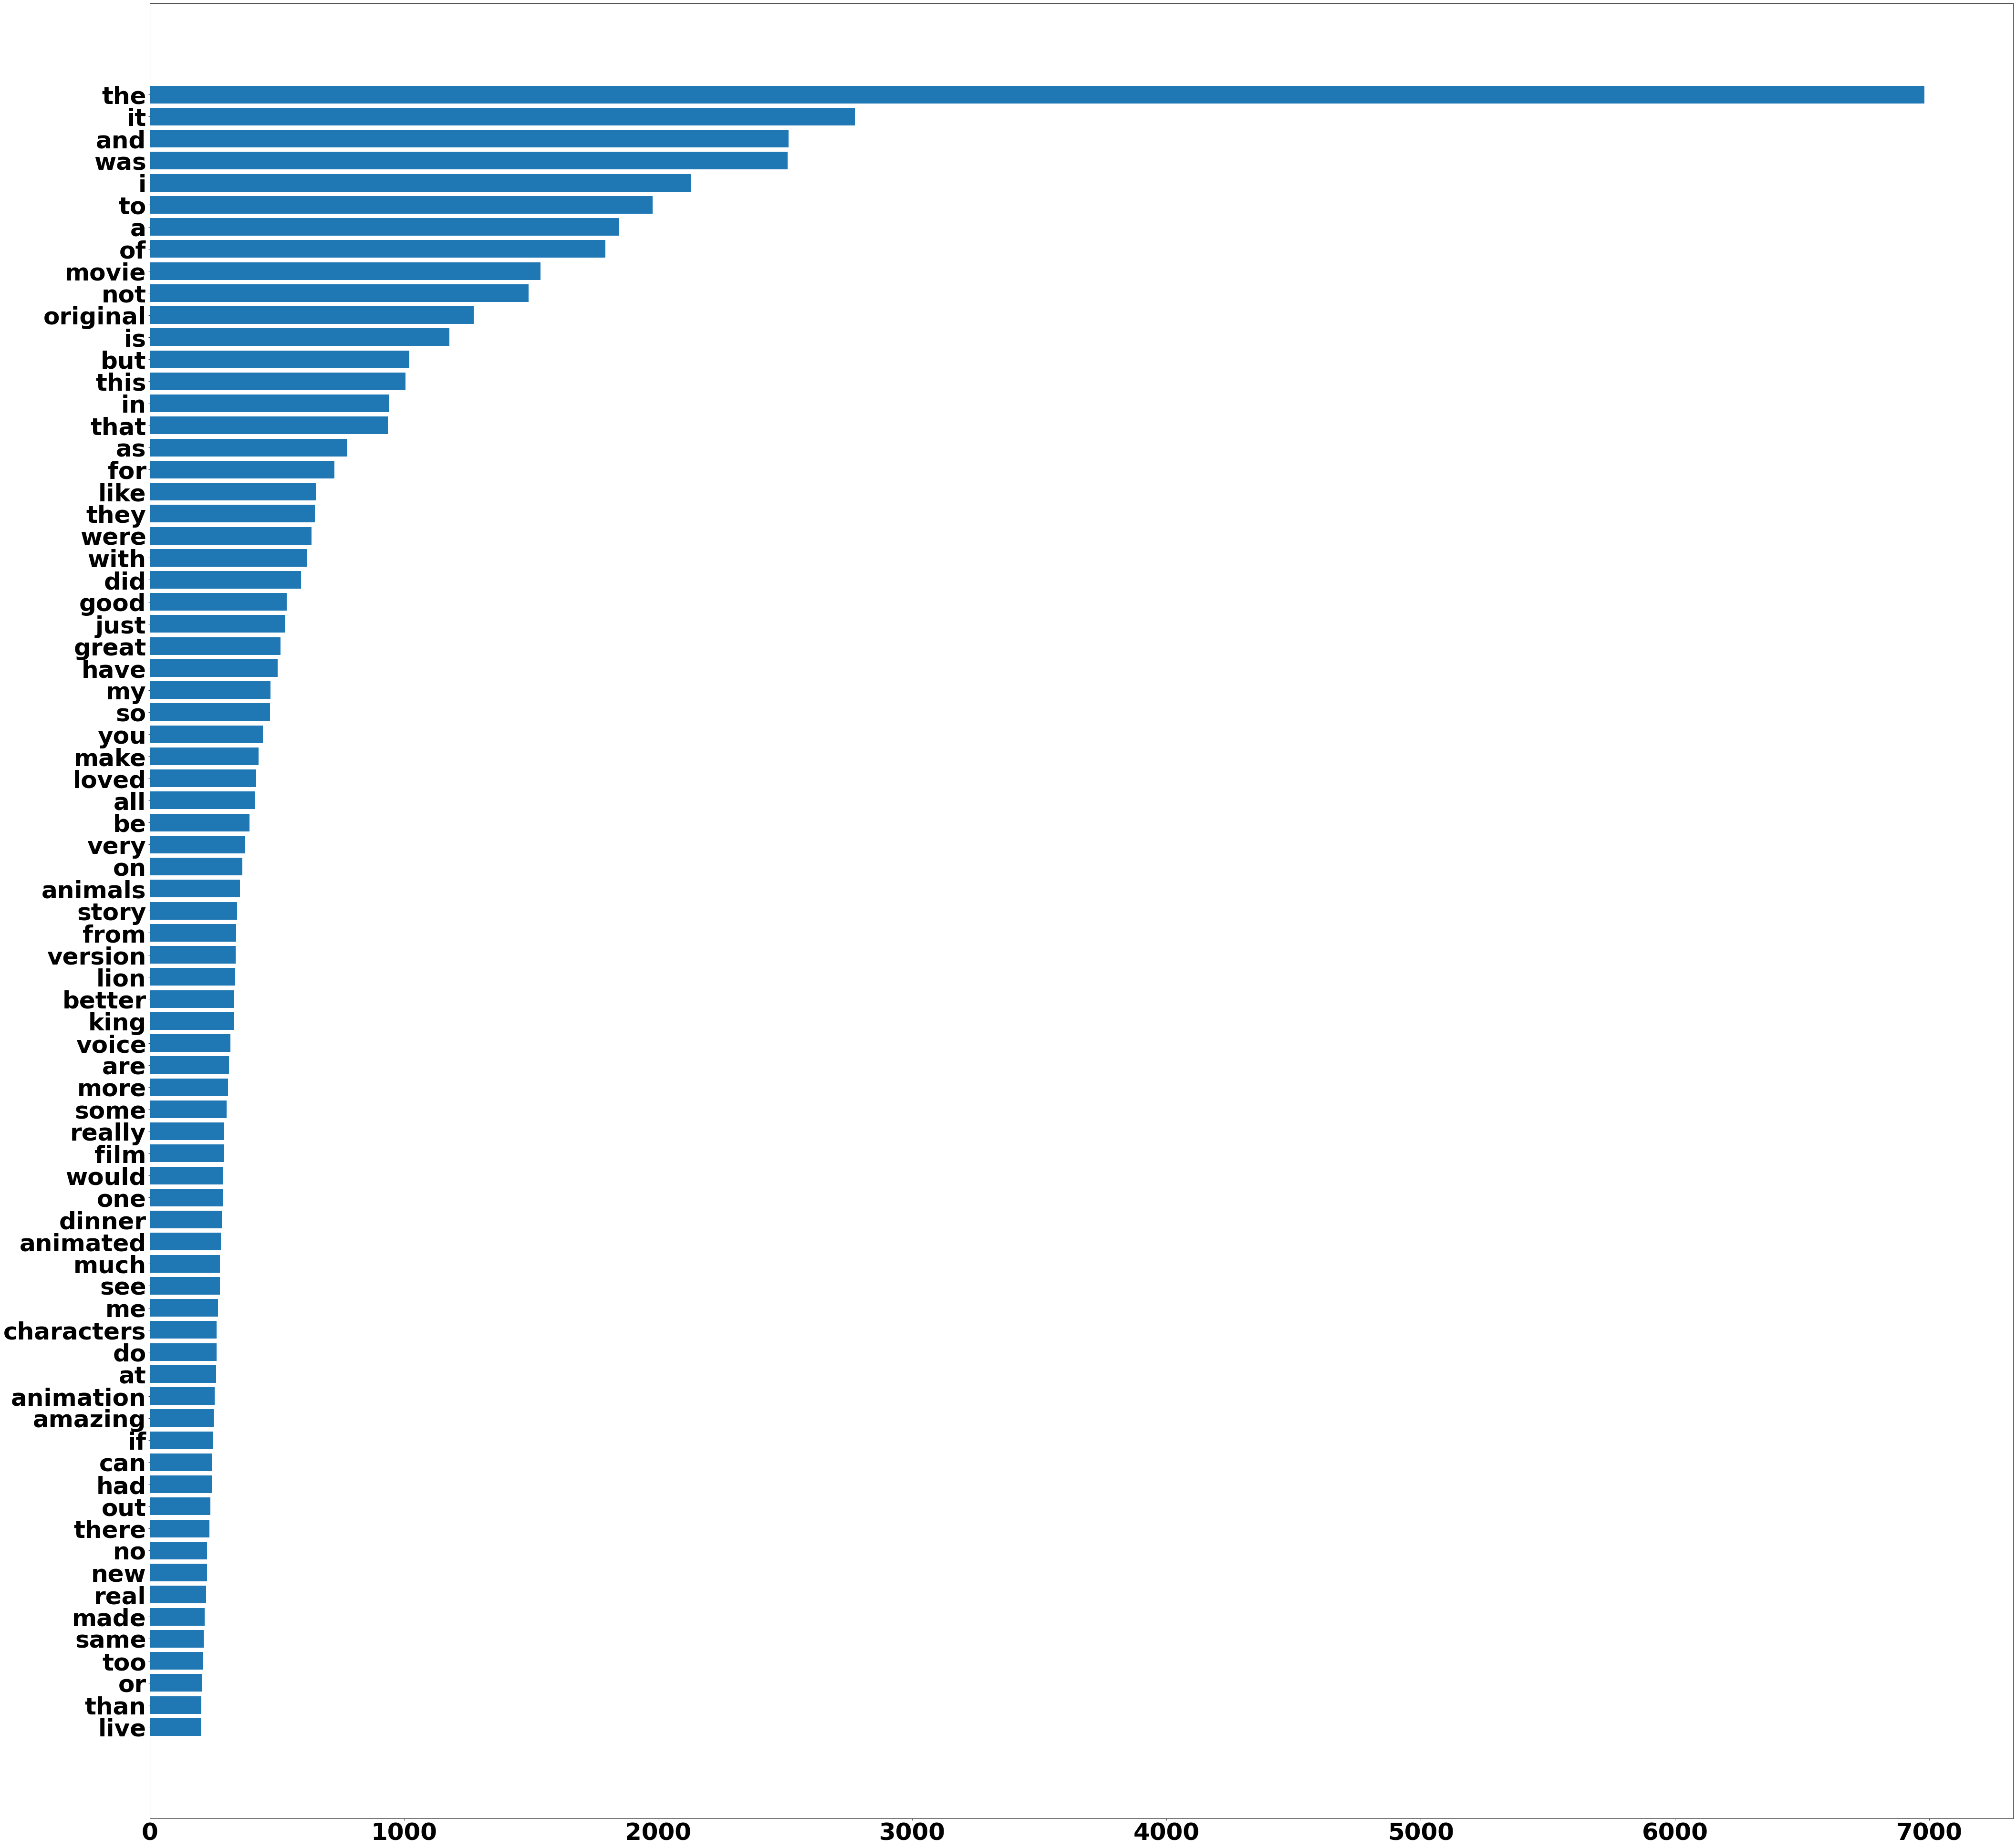

In [97]:
plt.rc('font', **font)
fig = plt.figure(figsize=(70,70))
plt.barh(all_values[:75], all_counts[:75])
plt.gca().invert_yaxis()
plt.show()

#### Observations from the Frequency Plots

1) The most occuring words present in both the graphs are quite different <br>
2) The most occuring words present in graph 1 (without stopwords) makes more sense.

In [98]:
#!pip install wordcloud

(-0.5, 399.5, 199.5, -0.5)

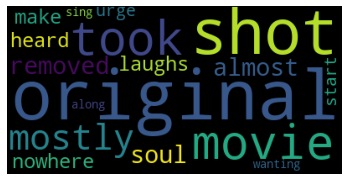

In [99]:

from wordcloud import WordCloud
wordcloud = WordCloud().generate(data['Review'][1])
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

<Figure size 432x288 with 0 Axes>

(-0.5, 399.5, 199.5, -0.5)

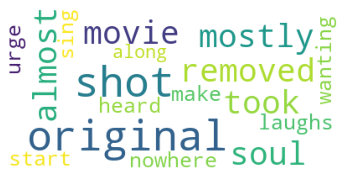

In [100]:
wordcloud = WordCloud(max_font_size=50, max_words=25, background_color="white").generate(data['Review'][1])
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# TF-IDF

In [101]:
## tfidf vectorizer needs sentence and not token. Hence we need to combine all the tokens back to form a string

data['clean_text_stemmed'] = [' '.join(text) for text in data['clean_text_stemmed']]
data['clean_text_lemmatized'] = [' '.join(text) for text in data['clean_text_lemmatized']]

In [102]:
data['clean_text_lemmatized'][0]

'like casting'

In [103]:
# Combine tokens on unseen data
unseen_data['clean_text_stemmed'] = [' '.join(text) for text in unseen_data['clean_text_stemmed']]
unseen_data['clean_text_lemmatized'] = [' '.join(text) for text in unseen_data['clean_text_lemmatized']]

In [104]:
from sklearn.feature_extraction.text import TfidfVectorizer

#define vectorizer parameters
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, max_features=10000,
                                 min_df=0.001,
                                 use_idf=True, ngram_range=(1,4))

tfidf_matrix = tfidf_vectorizer.fit_transform(data['clean_text_lemmatized'])

print(tfidf_matrix.shape)

(3000, 3488)


In [105]:
## Get me the feature name (term) of the vectors.
terms = tfidf_vectorizer.get_feature_names()

In [106]:
print(type(terms))
terms[:5]

<class 'list'>


['ability', 'able', 'absolute', 'absolutely', 'absolutely amazing']

In [107]:
type(tfidf_matrix)

scipy.sparse.csr.csr_matrix

#### TF-IDF for Unseen Data

In [108]:
#Transform Unseen Data

unseen_tfidf_matrix = tfidf_vectorizer.transform(unseen_data['clean_text_lemmatized'])

print(unseen_tfidf_matrix.shape)

(1200, 3488)


### TF-IDF on Lemmatized Data

In [109]:
data['text_stemmed'] = [' '.join(text) for text in data['text_stemmed']]
data['text_lemmatized'] = [' '.join(text) for text in data['text_lemmatized']]

In [110]:
#define vectorizer parameters
tfidf_vectorizer_NOSW = TfidfVectorizer(max_df=0.95, max_features=10000,
                                 min_df=0.001,
                                 use_idf=True, ngram_range=(1,4))

tfidf_matrix_NOSW = tfidf_vectorizer_NOSW.fit_transform(data['text_lemmatized'])
#tfidf_matrix_NOSW = tfidf_vectorizer_NOSW.fit_transform(data['text_stemmed'])

print(tfidf_matrix_NOSW.shape)

(3000, 10000)


In [111]:
type(tfidf_matrix_NOSW)

scipy.sparse.csr.csr_matrix

In [112]:
unseen_data['text_stemmed'] = [' '.join(text) for text in unseen_data['text_stemmed']]
unseen_data['text_lemmatized'] = [' '.join(text) for text in unseen_data['text_lemmatized']]

In [113]:
unseen_tfidf_matrix_NOSW1 = tfidf_vectorizer_NOSW.transform(unseen_data['text_lemmatized'])

print(unseen_tfidf_matrix_NOSW1.shape)

(1200, 10000)


#### <font color='yellow'> Insights from TF-IDF </font>
TF IDF matrix on the Lemmatized text which is not cleaned of Stop Words (data that contains stop words), gave better accuracy and predictions than Stemmed Data, Stemmed Data with stop words removed, Lemmatized data with stop words removed.

# K-mean Clustering

### Fitting the elbow curve to identify right number of clusters/topics

In [114]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import joblib
Sum_of_squared_distances = []
K = range(1,8)
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=143)
    kmeanModel.fit(tfidf_matrix)
    Sum_of_squared_distances.append(kmeanModel.inertia_)
    

KMeans(n_clusters=1, random_state=143)

KMeans(n_clusters=2, random_state=143)

KMeans(n_clusters=3, random_state=143)

KMeans(n_clusters=4, random_state=143)

KMeans(n_clusters=5, random_state=143)

KMeans(n_clusters=6, random_state=143)

KMeans(n_clusters=7, random_state=143)

Text(0.5, 0, 'k')

Text(0, 0.5, 'Sum_of_squared_distances')

Text(0.5, 1.0, 'Elbow Method For Optimal k')

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


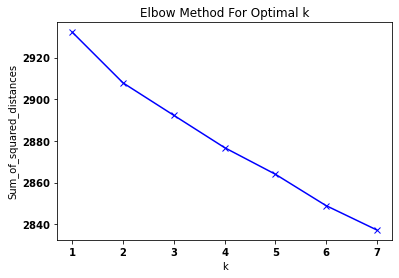

In [115]:
## Plot the elbow

## Distortion, on the y-axis, corresponds to our cost function: 
## the sum of squared difference between each data point and the centroid, i.e., the cluster centre.

## As K increases the corresponding distortion value will tend to zero, 
## because you end up having just one data point per cluster. With only one data point in per cluster, 
## the centroid is the data point itself, so the distortion will be equal to zero.

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 10}

plt.rc('font', **font)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()


In [116]:
num_clusters = 2

km = KMeans(n_clusters=num_clusters)

km.fit(tfidf_matrix)
#km.labels_
clusters = km.labels_.tolist()
#km.cluster_centers
centers = km.cluster_centers_
print(f"the cluster centers are {centers}")

joblib.dump(km,  'doc_cluster_best_K.pkl')

KMeans(n_clusters=2)

the cluster centers are [[0.00034284 0.00201919 0.00088733 ... 0.00061606 0.00013681 0.00057832]
 [0.         0.         0.         ... 0.         0.00085064 0.        ]]


['doc_cluster_best_K.pkl']

### Getting the top words from each cluster

In [117]:
print(km.cluster_centers_)
print(km.cluster_centers_.shape)

[[0.00034284 0.00201919 0.00088733 ... 0.00061606 0.00013681 0.00057832]
 [0.         0.         0.         ... 0.         0.00085064 0.        ]]
(2, 3488)


#### argsort()
[1,2,3,5,4] -----> sort ---->[1,2,3,4,5]<br>
argsort------>[0,1,2,4,3] ---> index of the element in the original list

In [118]:
km.cluster_centers_.argsort()

array([[1905, 1891, 1892, ..., 1643, 2324, 2041],
       [   0, 2132, 2133, ..., 2041, 1889, 1858]])

In [119]:
## Reversing the list so that index of max element is in 0th index
km.cluster_centers_.argsort()[:,::-1]

array([[2041, 2324, 1643, ..., 1892, 1891, 1905],
       [1858, 1889, 2041, ..., 2133, 2132,    0]])

In [120]:
from __future__ import print_function

print("Top terms per cluster:")

#sort cluster centers by proximity to centroid and picking the top 6 words per cluster
order_centroids = km.cluster_centers_.argsort()[:, ::-1] 
for i in range(num_clusters):
    print()
    print("Top words in Cluster-%d :" % i, end='')
    print()
    for ind in order_centroids[i, :6]: #replace 6 with n words per cluster
        print('%s' % terms[ind].split(' '), end=',')

Top terms per cluster:

Top words in Cluster-0 :
['movie'],['original'],['like'],['good'],['great'],['well'],
Top words in Cluster-1 :
['love'],['love', 'movie'],['movie'],['great'],['original'],['amazing'],

In [121]:
data['cluster_group'] = clusters
data.pop('clean_text', None)
pd.DataFrame(data).head(6)

,index,ReviewID,Reviewer Name,Review,Rating,date,Verified,SuperReviewer,day,Sentiment,word_count,clean_text_stemmed,clean_text_lemmatized,text_stemmed,text_lemmatized,cluster_group
0,3,7C974242-BDB7-45E8-878E-CDF5C2965132,Brent,i did not like the casting,3.0,2019-08-20 01:15:29.523,False,False,Tuesday,1,6,like cast,like casting,i did not like the cast,I do not like the casting,0
1,10,448869182,NaN,the movie took the original mostly shot for sh...,1.5,2019-08-19 23:53:16.203,False,False,Monday,1,43,movi took origin shot shot remov soul origin l...,movie take original shoot shot remove soul ori...,the movi took the origin most shot for shot bu...,the movie take the original mostly shoot for s...,0
2,16,D4B86331-6E20-4E69-A708-0CB88EB096E6,movie fanatic,horrible i knew i did not keep procrastinatin...,1.0,2019-08-19 20:26:10.752,False,False,Monday,1,176,horribl knew procrastin watch movi time took t...,horrible know procrastinating watch movie time...,horribl i knew i did not keep procrastin watch...,horrible I know I do not keep procrastinating ...,0
3,18,C44812D0-0A3F-4981-9EBC-1E8A12D2DA2D,Xavier,animation was beautiful too beautiful hard t...,2.0,2019-08-19 19:24:53.066,True,False,Monday,1,30,anim beauti beauti hard convey facial express ...,animation beautiful beautiful hard convey faci...,anim was beauti too beauti hard to convey faci...,animation be beautiful too beautiful hard to c...,0
4,19,978157736,Hei L,test how are you doing what are you doing hel...,2.5,2019-08-19 18:51:40.301,False,False,Monday,1,14,test hello,test hello,test how are you do what are you do hello what...,test how be you do what be you do hello what b...,0
5,24,d12c1a8e-a4c7-4791-8af5-e1ce94c4ca28,Daniel D,great animation story line followed the orig...,3.0,2019-08-19 16:58:51.958,True,False,Monday,1,22,great anim stori line follow origin seen excit,great animation story line follow original see...,great anim stori line follow the origin so if ...,great animation story line follow the original...,0


In [122]:
data.keys()

dict_keys(['index', 'ReviewID', 'Reviewer Name', 'Review', 'Rating', 'date', 'Verified', 'SuperReviewer', 'day', 'Sentiment', 'word_count', 'clean_text_stemmed', 'clean_text_lemmatized', 'text_stemmed', 'text_lemmatized', 'cluster_group'])

In [123]:
cluster_df = pd.DataFrame(data)

In [124]:
cluster_df['cluster_group'].value_counts()

0    2596
1     404
Name: cluster_group, dtype: int64

#### Fetching the most frequent words among each cluster

Step 1) Tokenize the entire text <br>
Step 2) Group the tokenized text by cluster id (output is list of lists: [[],[],[]])<br>
Step 3) Unlist the array of lists for each cluster group using chain function from itertools

In [125]:
##Step 1
cluster_df['tokenized_text'] = [text.split(' ') for text in cluster_df['clean_text_lemmatized']]

In [126]:
##Step 2
grouped_text = cluster_df.groupby('cluster_group')['tokenized_text']

In [127]:
## Fetch entire tokenized text for specific group
grouped_text.get_group(0)

0                                         [like, casting]
1       [movie, take, original, shoot, shot, remove, s...
2       [horrible, know, procrastinating, watch, movie...
3       [animation, beautiful, beautiful, hard, convey...
4                                           [test, hello]
                              ...                        
2992    [movie, dinner, sure, know, right, animal, rea...
2994                               [animation, excellent]
2995    [like, movie, animal, look, extremely, real, s...
2998                               [great, family, movie]
2999    [think, follow, original, closely, possible, e...
Name: tokenized_text, Length: 2596, dtype: object

In [128]:
from itertools import chain

In [129]:
frequent_words_df = pd.DataFrame(columns={"values", "counts", "cluster_id"})

In [130]:
for num in range(num_clusters):
    values, counts = np.unique(list(chain.from_iterable(grouped_text.get_group(num))), return_counts=True)
    sorted_indices = np.argsort(-counts)
    frequent_words_df = frequent_words_df.append({"values":values[sorted_indices], "counts":counts[sorted_indices], "cluster_id": num}, ignore_index=True)

In [131]:
frequent_words_df.head()

,values,cluster_id,counts
0,"[movie, original, like, good, great, voice, li...",0,"[1352, 1200, 785, 644, 451, 421, 368, 366, 352..."
1,"[love, movie, original, great, animal, amazing...",1,"[455, 186, 75, 73, 45, 43, 39, 34, 33, 28, 27,..."


<AxesSubplot:>

<BarContainer object of 20 artists>

<AxesSubplot:>

<BarContainer object of 20 artists>

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


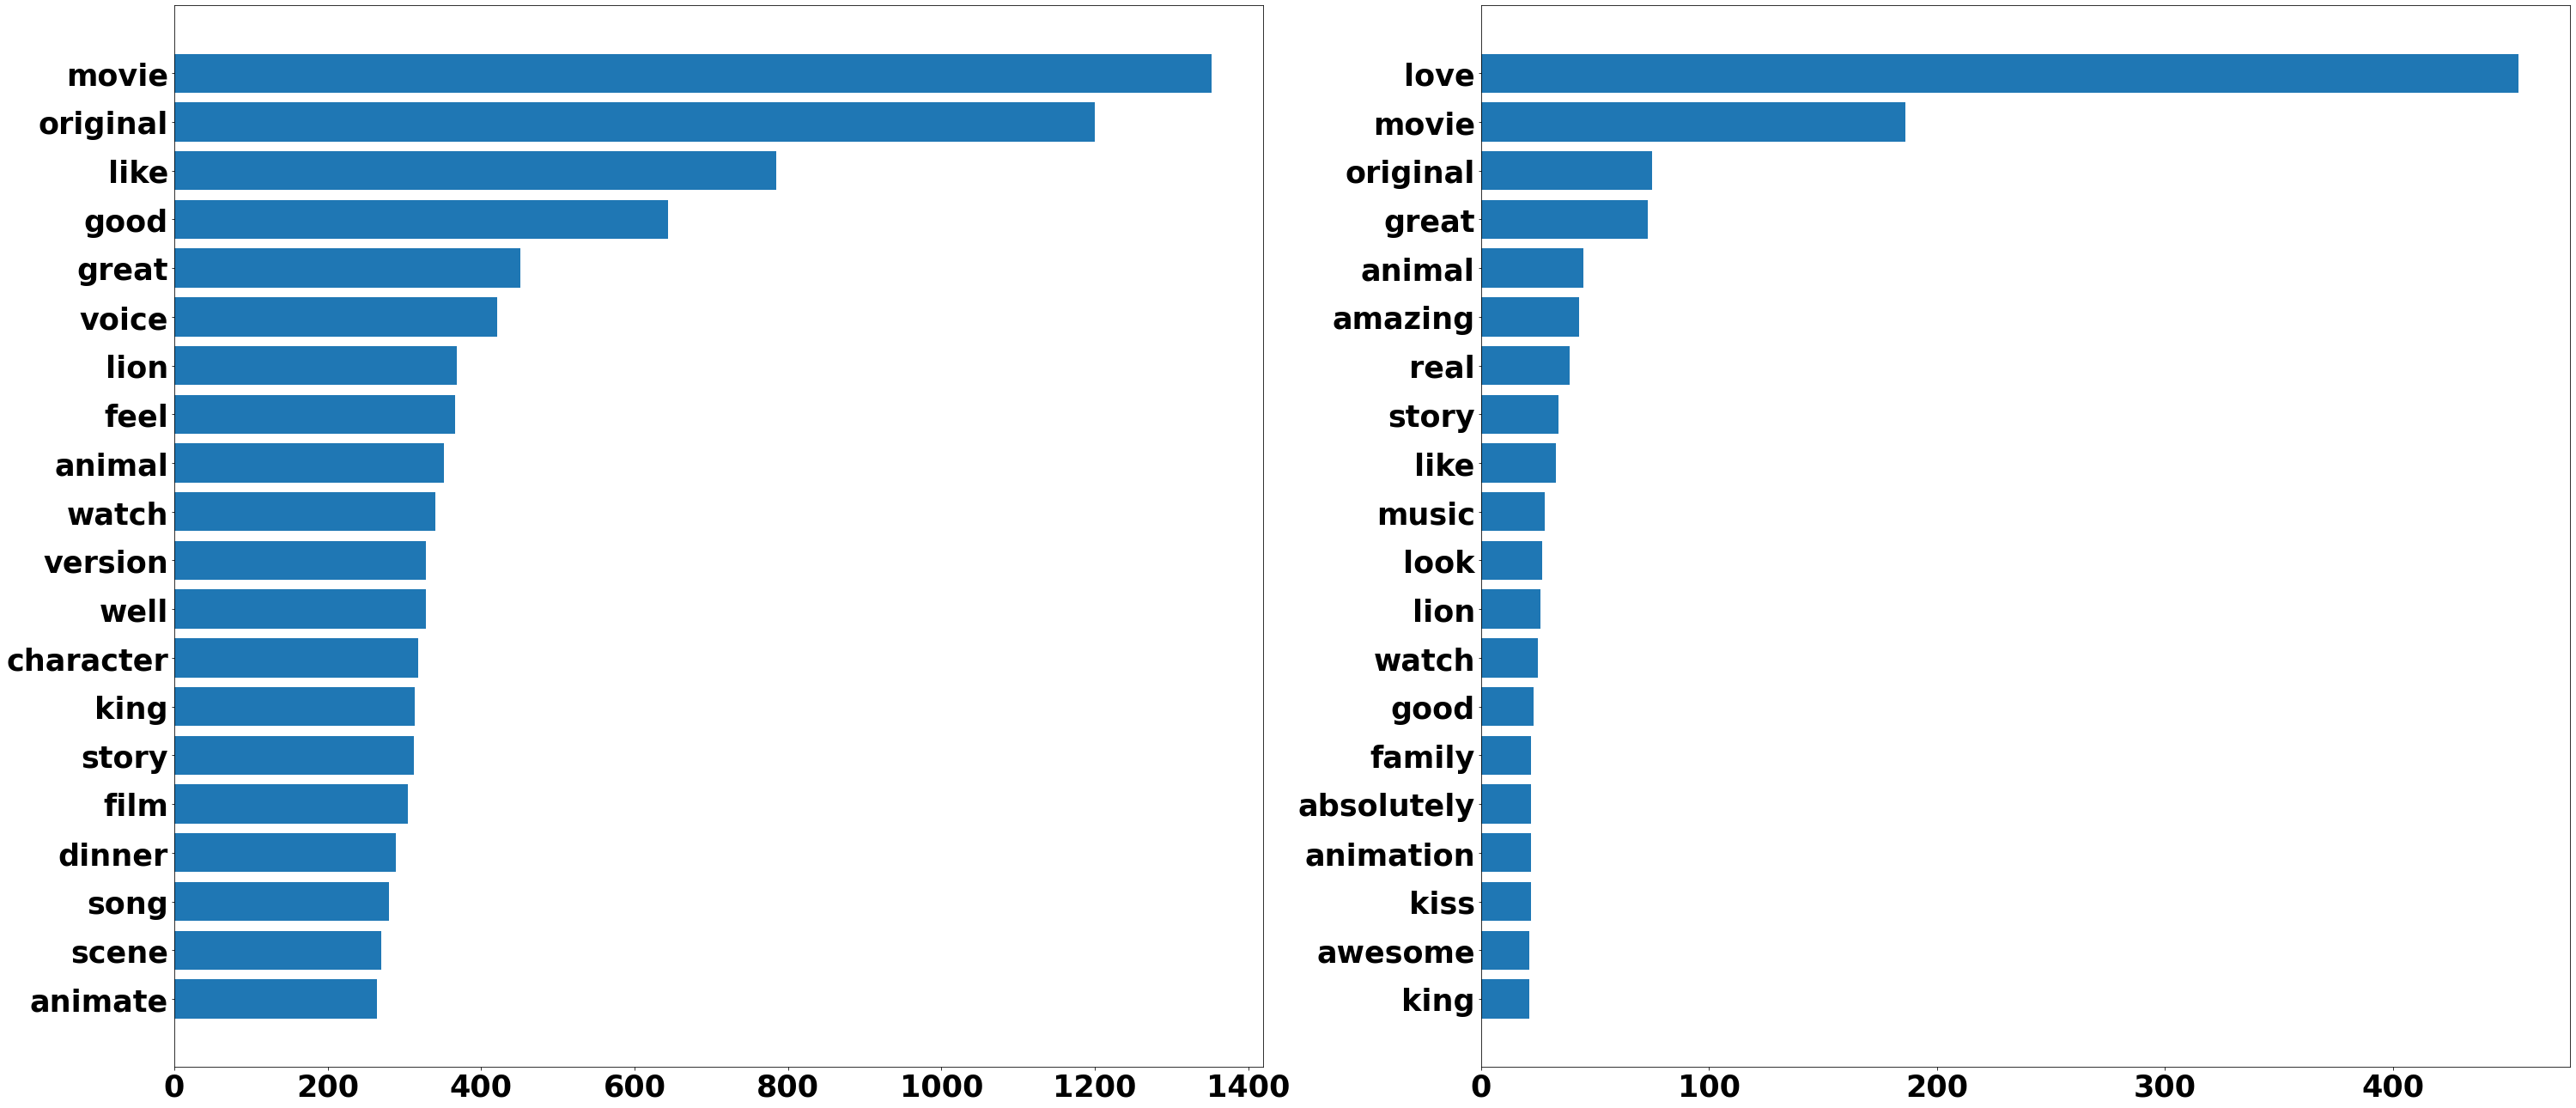

In [132]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 35}

plt.rc('font', **font)

fig = plt.figure(figsize=(50,50))
plt.subplot(2,2,1)
plt.barh(frequent_words_df.loc[0,'values'][:20], frequent_words_df.loc[0,'counts'][:20])
plt.gca().invert_yaxis()


plt.subplot(2,2,2)
plt.barh(frequent_words_df.loc[1,'values'][:20], frequent_words_df.loc[1,'counts'][:20])
plt.gca().invert_yaxis()


### Truncated SVD (Latent Semantic Analysis - LSA) using Scikitlearn

<img src="SVD1.png">

In this case, U ∈ ℝ^(m ⨉ t) emerges as our document-topic matrix, and V ∈ ℝ^(n ⨉ t) becomes our term-topic matrix. In both U and V, the columns correspond to one of our t topics. 

In U, rows represent document vectors expressed in terms of topics; in V, rows represent term vectors expressed in terms of topics.

In [133]:
from sklearn.decomposition import TruncatedSVD

In [134]:
n_components = 8
svd_model = TruncatedSVD(n_components=n_components, algorithm='randomized',n_iter=20,random_state=143)

svd_matrix = svd_model.fit(tfidf_matrix)

svd_matrix

TruncatedSVD(n_components=8, n_iter=20, random_state=143)

In [135]:
print(f"Explained Variance Ratio : {svd_matrix.explained_variance_ratio_}") 
print(f"Total Explained Variance : {round(svd_matrix.explained_variance_ratio_.sum() * 100, 2)} %")
print(f"The singular values are {svd_matrix.singular_values_}")

Explained Variance Ratio : [0.00456083 0.01219036 0.0090399  0.00791477 0.00746122 0.00716421
 0.00687089 0.00630353]
Total Explained Variance : 6.15 %
The singular values are [8.48527669 5.99704206 5.15086936 4.83237279 4.67743038 4.5942154
 4.49723644 4.30720229]


### Picking the few most important words in each topic

The components of svd_model are our topics and we can access them using svdmodel.components.<br>
let's print a few most important words in each of the 4 topics and see how our model has done.

In [136]:
for i, comp in enumerate(svd_model.components_):
    print(f"The component is {comp} and shape is {comp.shape}")
    terms_comp = zip(terms, comp)
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:6]
    print("Topic "+str(i)+": ")
    for t in sorted_terms:
        print(f"{t[0]} -- {t[1]}")
    print(" ")

The component is [0.00198495 0.00945116 0.00432065 ... 0.00411231 0.00172927 0.00355843] and shape is (3488,)
Topic 0: 
movie -- 0.42395118121250214
original -- 0.293137589565007
love -- 0.27963903863499495
like -- 0.23023440260866865
good -- 0.2074691637753482
great -- 0.1957167609218668
 
The component is [-0.00187698 -0.00259114 -0.00428688 ... -0.00273621  0.00131631
 -0.00356343] and shape is (3488,)
Topic 1: 
love -- 0.6461277851479801
love movie -- 0.3504708756701869
movie -- 0.2745924770100829
great -- 0.14696254285736693
great movie -- 0.09454518493343195
movie love -- 0.05931110086405292
 
The component is [-1.38059471e-03  4.17640898e-03  6.51178440e-04 ... -1.22327728e-03
 -3.11676284e-05 -1.64205126e-03] and shape is (3488,)
Topic 2: 
movie -- 0.4853279526720499
great -- 0.399983874832025
great movie -- 0.292078242028609
good -- 0.1398043781614396
good movie -- 0.11551721578116356
enjoy -- 0.07810600396053743
 
The component is [-0.00253401 -0.00353132  0.00156701 ... -0.0

### Tagging each document with a topic

In [137]:
doc_topic_matrix = svd_matrix.transform(tfidf_matrix)
print(doc_topic_matrix)
svd_categories = np.argmax(doc_topic_matrix, axis=1)
print(svd_categories)

[[ 0.09072187 -0.08047251 -0.04087679 ...  0.22416092  0.06140608
  -0.14916257]
 [ 0.14958365 -0.04868245 -0.0022536  ... -0.01657976 -0.0637866
   0.00459702]
 [ 0.28476885 -0.04423886  0.10809961 ...  0.10682901 -0.0293729
   0.00188777]
 ...
 [ 0.24476707  0.20950162  0.15264626 ... -0.07532478  0.03087501
  -0.00401768]
 [ 0.14400489  0.12109024  0.22187148 ... -0.06890747 -0.00789827
  -0.03379957]
 [ 0.10561125 -0.06154683 -0.02115979 ... -0.04480206 -0.02478365
   0.02426854]]
[5 0 0 ... 0 2 0]


In [138]:
data['SVD_group'] = svd_categories

In [139]:
pd.DataFrame(data).head(6)

,index,ReviewID,Reviewer Name,Review,Rating,date,Verified,SuperReviewer,day,Sentiment,word_count,clean_text_stemmed,clean_text_lemmatized,text_stemmed,text_lemmatized,cluster_group,SVD_group
0,3,7C974242-BDB7-45E8-878E-CDF5C2965132,Brent,i did not like the casting,3.0,2019-08-20 01:15:29.523,False,False,Tuesday,1,6,like cast,like casting,i did not like the cast,I do not like the casting,0,5
1,10,448869182,NaN,the movie took the original mostly shot for sh...,1.5,2019-08-19 23:53:16.203,False,False,Monday,1,43,movi took origin shot shot remov soul origin l...,movie take original shoot shot remove soul ori...,the movi took the origin most shot for shot bu...,the movie take the original mostly shoot for s...,0,0
2,16,D4B86331-6E20-4E69-A708-0CB88EB096E6,movie fanatic,horrible i knew i did not keep procrastinatin...,1.0,2019-08-19 20:26:10.752,False,False,Monday,1,176,horribl knew procrastin watch movi time took t...,horrible know procrastinating watch movie time...,horribl i knew i did not keep procrastin watch...,horrible I know I do not keep procrastinating ...,0,0
3,18,C44812D0-0A3F-4981-9EBC-1E8A12D2DA2D,Xavier,animation was beautiful too beautiful hard t...,2.0,2019-08-19 19:24:53.066,True,False,Monday,1,30,anim beauti beauti hard convey facial express ...,animation beautiful beautiful hard convey faci...,anim was beauti too beauti hard to convey faci...,animation be beautiful too beautiful hard to c...,0,0
4,19,978157736,Hei L,test how are you doing what are you doing hel...,2.5,2019-08-19 18:51:40.301,False,False,Monday,1,14,test hello,test hello,test how are you do what are you do hello what...,test how be you do what be you do hello what b...,0,0
5,24,d12c1a8e-a4c7-4791-8af5-e1ce94c4ca28,Daniel D,great animation story line followed the orig...,3.0,2019-08-19 16:58:51.958,True,False,Monday,1,22,great anim stori line follow origin seen excit,great animation story line follow original see...,great anim stori line follow the origin so if ...,great animation story line follow the original...,0,0


#### Clustering the Document-Topic matrix

In [140]:
from sklearn.cluster import KMeans
Sum_of_squared_distances = []
K = range(1,8)
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=143)
    kmeanModel.fit(doc_topic_matrix)
    Sum_of_squared_distances.append(kmeanModel.inertia_)

KMeans(n_clusters=1, random_state=143)

KMeans(n_clusters=2, random_state=143)

KMeans(n_clusters=3, random_state=143)

KMeans(n_clusters=4, random_state=143)

KMeans(n_clusters=5, random_state=143)

KMeans(n_clusters=6, random_state=143)

KMeans(n_clusters=7, random_state=143)

Text(0.5, 0, 'k')

Text(0, 0.5, 'Sum_of_squared_distances')

Text(0.5, 1.0, 'Elbow Method For Optimal k')

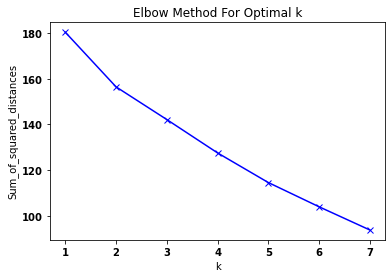

In [141]:
## Plot the elbow

## Distortion, on the y-axis, corresponds to our cost function: 
## the sum of squared difference between each data point and the centroid, i.e., the cluster centre.

## As K increases the corresponding distortion value will tend to zero, 
## because you end up having just one data point per cluster. With only one data point in per cluster, 
## the centroid is the data point itself, so the distortion will be equal to zero.

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 10}

plt.rc('font', **font)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [142]:
import joblib
num_clusters = 2

km = KMeans(n_clusters=num_clusters)

km.fit(doc_topic_matrix)

clusters = km.labels_.tolist()

centers = km.cluster_centers_
print(f"the cluster centers are {centers}")

joblib.dump(km,  'doc_topic_cluster_best_K.pkl')

KMeans(n_clusters=2)

the cluster centers are [[ 0.17426745  0.20095321 -0.10221638  0.00402756  0.00900509 -0.02049547
   0.02302036 -0.01285359]
 [ 0.13488394 -0.03841476  0.01125293 -0.00850238 -0.00065215 -0.00368542
   0.00257056  0.00731228]]


['doc_topic_cluster_best_K.pkl']

In [143]:
clusters = km.labels_.tolist()
data['doc_topic_cluster_group'] = clusters

In [144]:
doc_cluster_df = pd.DataFrame(data)

In [145]:
doc_cluster_df['doc_topic_cluster_group'].value_counts()

1    2626
0     374
Name: doc_topic_cluster_group, dtype: int64

#### Fetching the most frequent words among each cluster

Step 1) Tokenize the entire text <br>
Step 2) Group the tokenized text by cluster id (output is list of lists: [[],[],[]])<br>
Step 3) Unlist the array of lists for each cluster group using chain function from itertools

In [146]:
##Step 1
doc_cluster_df['tokenized_text'] = [text.split(' ') for text in doc_cluster_df['clean_text_lemmatized']]

In [147]:
##Step 2
grouped_text = doc_cluster_df.groupby('doc_topic_cluster_group')['tokenized_text']

In [148]:
frequent_words_df = pd.DataFrame(columns={"values", "counts", "cluster_id"})

In [149]:
from itertools import chain
for num in range(num_clusters):
    values, counts = np.unique(list(chain.from_iterable(grouped_text.get_group(num))), return_counts=True)
    sorted_indices = np.argsort(-counts)
    frequent_words_df = frequent_words_df.append({"values":values[sorted_indices], "counts":counts[sorted_indices], "cluster_id": num}, ignore_index=True)

In [150]:
frequent_words_df.head()

,values,cluster_id,counts
0,"[love, movie, great, original, amazing, animal...",0,"[422, 174, 70, 62, 38, 33, 30, 30, 26, 24, 23,..."
1,"[movie, original, like, good, great, voice, li...",1,"[1364, 1213, 792, 652, 454, 423, 371, 369, 364..."


<AxesSubplot:>

<BarContainer object of 20 artists>

<AxesSubplot:>

<BarContainer object of 20 artists>

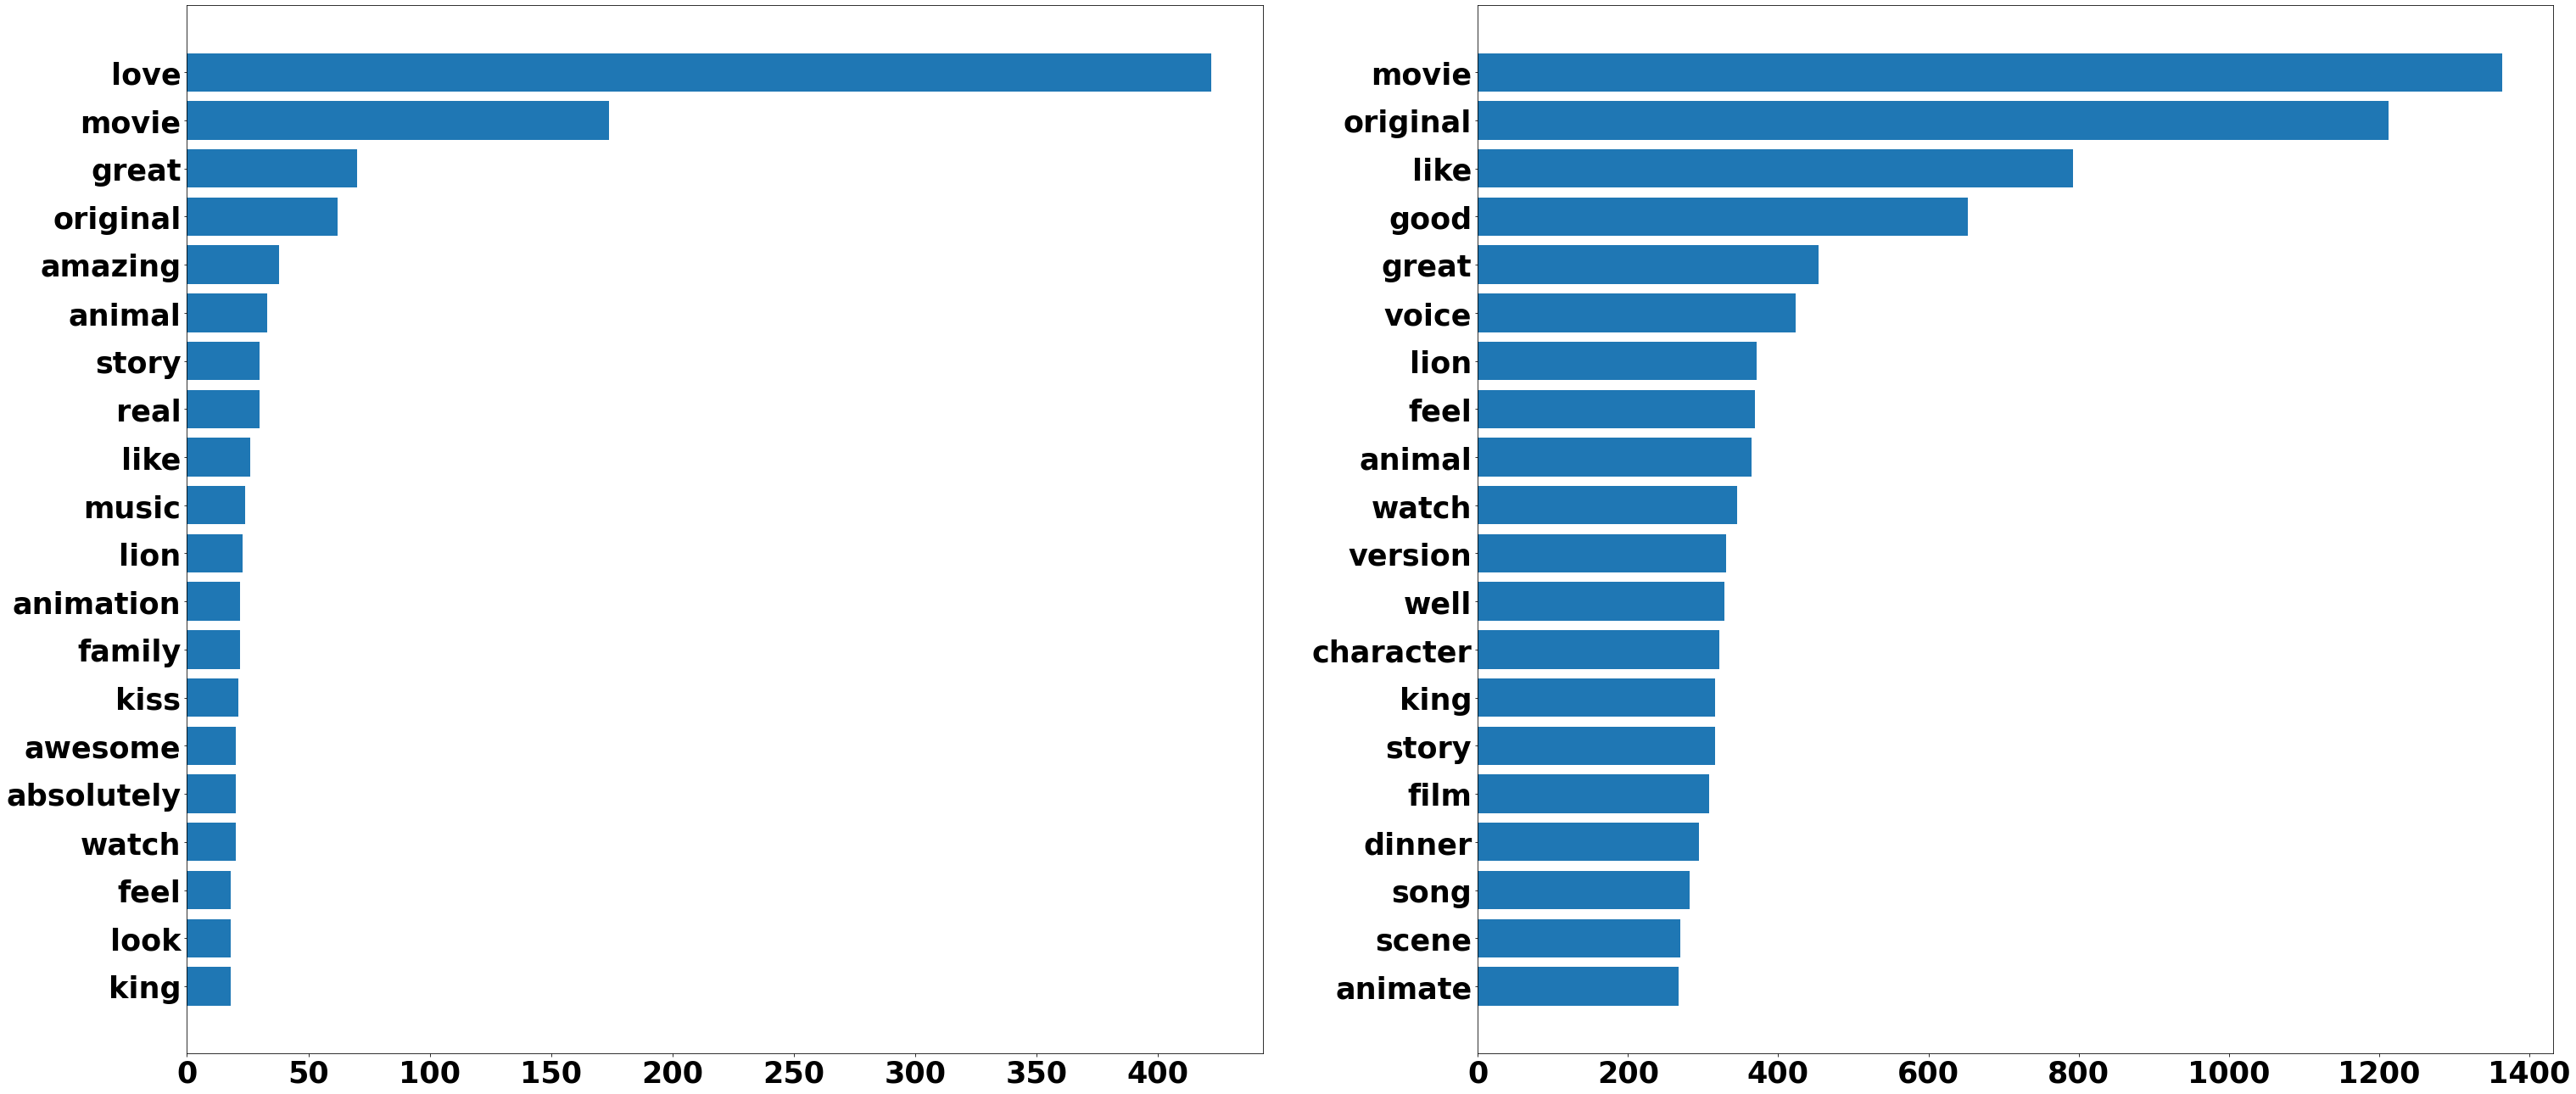

In [151]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 35}

plt.rc('font', **font)

fig = plt.figure(figsize=(50,50))
plt.subplot(2,2,1)
plt.barh(frequent_words_df.loc[0,'values'][:20], frequent_words_df.loc[0,'counts'][:20])
plt.gca().invert_yaxis()


plt.subplot(2,2,2)
plt.barh(frequent_words_df.loc[1,'values'][:20], frequent_words_df.loc[1,'counts'][:20])
plt.gca().invert_yaxis()


#### Observations

We can notice that the frequency plots of words for clustering on tfidf matrix and document-topic matrix are same.
Hence the above step can be used to validate our results.

## <font color='blue'> 4. Building Models </font>

### Train Test Split

In [152]:
blogs_df.columns

Index(['ReviewID', 'Reviewer Name', 'Review', 'Rating', 'date', 'Verified',
       'SuperReviewer', 'day', 'Sentiment', 'word_count'],
      dtype='object')

In [153]:
print(blogs_df['Sentiment'].value_counts())

1    1500
0    1500
Name: Sentiment, dtype: int64


In [154]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

In [155]:
# Convert the TF-IDF Sparse matrix to Dense matrix
X = tfidf_matrix.todense()
y = blogs_df['Sentiment']

# Train - Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123) 

In [156]:
# Printing Value Counts
print(y_train.value_counts())
print(y_test.value_counts())

print(y_train.head(30))
print(y_test.head(30))

1    1053
0    1047
Name: Sentiment, dtype: int64
0    453
1    447
Name: Sentiment, dtype: int64
1934    0
1988    1
3594    1
5357    1
2036    0
5042    1
930     0
1275    0
1183    1
3119    1
5153    1
417     0
444     1
1544    0
1457    0
24      1
140     1
1170    0
1039    1
3874    1
3467    1
1758    0
4876    1
5346    1
869     0
2875    1
2675    1
3680    1
1134    1
689     0
Name: Sentiment, dtype: int64
245     0
406     0
1542    1
128     0
4470    1
2422    1
1196    0
314     1
3868    1
4695    1
1829    0
107     1
2922    1
3280    1
1785    0
903     0
382     1
3115    1
895     1
1416    0
607     0
2507    1
1012    0
5045    1
1140    1
2500    1
1873    0
2029    0
3711    1
2380    1
Name: Sentiment, dtype: int64


#### Logistic Regression

In [157]:
for c in [0.01, 0.05, 0.25, 0.5, 1]:
    
    lr = LogisticRegression(C=c)
    lr.fit(X_train, y_train)
    print ("Train Accuracy for C=%s: %s" 
          % (c, accuracy_score(y_train, lr.predict(X_train))))
    print ("Accuracy for C=%s: %s" 
           % (c, accuracy_score(y_test, lr.predict(X_test))))
    print ("Train F1 for C=%s: %s"
          % (c, f1_score(y_train, lr.predict(X_train),average='weighted')))
    print ("Test F1 for C=%s: %s" 
          % (c, f1_score(y_test, lr.predict(X_test),average='weighted')))
    print("--------------------------------------------------------------")

LogisticRegression(C=0.01)

Train Accuracy for C=0.01: 0.8104761904761905
Accuracy for C=0.01: 0.7766666666666666
Train F1 for C=0.01: 0.8076392475581872
Test F1 for C=0.01: 0.7731590652521741
--------------------------------------------------------------


LogisticRegression(C=0.05)

Train Accuracy for C=0.05: 0.830952380952381
Accuracy for C=0.05: 0.7855555555555556
Train F1 for C=0.05: 0.8297012424476288
Test F1 for C=0.05: 0.7839359751359752
--------------------------------------------------------------


LogisticRegression(C=0.25)

Train Accuracy for C=0.25: 0.8614285714285714
Accuracy for C=0.25: 0.7966666666666666
Train F1 for C=0.25: 0.8610192220575061
Test F1 for C=0.25: 0.796136538839895
--------------------------------------------------------------


LogisticRegression(C=0.5)

Train Accuracy for C=0.5: 0.8852380952380953
Accuracy for C=0.5: 0.8033333333333333
Train F1 for C=0.5: 0.8850715213467413
Test F1 for C=0.5: 0.8031712809970956
--------------------------------------------------------------


LogisticRegression(C=1)

Train Accuracy for C=1: 0.9061904761904762
Accuracy for C=1: 0.7966666666666666
Train F1 for C=1: 0.9061331087974989
Test F1 for C=1: 0.7966046496120797
--------------------------------------------------------------


In [158]:
## To Dense the unseen TF-IDF Matrix
X_unseen = unseen_tfidf_matrix.todense()


In [159]:
# Creating another prediction object with logreg hyper parameter, and then predict.
lr_pred = LogisticRegression(C=1)
lr_pred.fit(X_train, y_train)

Logreg_unseen_pred = lr_pred.predict(X_unseen)

LogisticRegression(C=1)

In [160]:
#pd.DataFrame(Logreg_unseen_pred).to_csv("Logreg_unseen_pred_0827_1.csv")

f1=0.800 auc=0.869 ap=0.870


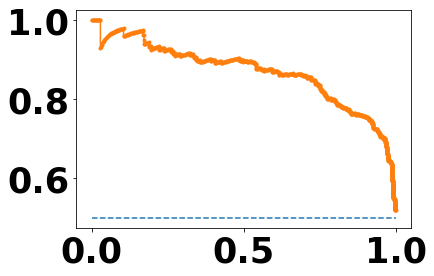

In [161]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
from matplotlib import pyplot

# predict probabilities
probs = lr.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# predict class values
yhat = lr.predict(X_test)
# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, probs)
# calculate F1 score
f1 = f1_score(y_test, yhat)
# calculate precision-recall AUC
auc = auc(recall, precision)
# calculate average precision score
ap = average_precision_score(y_test, probs)
print('f1=%.3f auc=%.3f ap=%.3f' % (f1, auc, ap))
# plot no skill
pyplot.plot([0, 1], [0.5, 0.5], linestyle='--')
# plot the precision-recall curve for the model
pyplot.plot(recall, precision, marker='.')
# show the plot
pyplot.show()

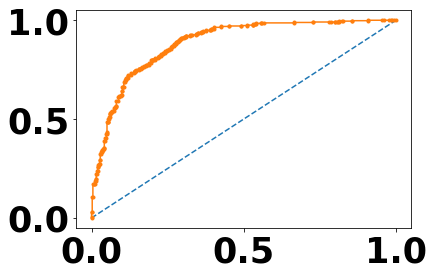

In [162]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the precision-recall curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()

### Log Reg on No Stop Words (NOSW)

In [163]:
X_NOSW = tfidf_matrix_NOSW.todense()
y_NOSW = blogs_df['Sentiment']
X_train_NOSW, X_test_NOSW, y_train_NOSW, y_test_NOSW = train_test_split(X_NOSW, y_NOSW, test_size=0.3, random_state=123) 

In [164]:
for c in [0.01, 0.05, 0.25, 0.5, 1]:
    
    lr_NOSW = LogisticRegression(C=c)
    lr_NOSW.fit(X_train_NOSW, y_train_NOSW)
    print ("Train Accuracy for C=%s: %s" 
          % (c, accuracy_score(y_train_NOSW, lr_NOSW.predict(X_train_NOSW))))
    print ("Accuracy for C=%s: %s" 
           % (c, accuracy_score(y_test_NOSW, lr_NOSW.predict(X_test_NOSW))))
    print ("Train F1 for C=%s: %s"
          % (c, f1_score(y_train_NOSW, lr_NOSW.predict(X_train_NOSW),average='weighted')))
    print ("Test F1 for C=%s: %s" 
          % (c, f1_score(y_test_NOSW, lr_NOSW.predict(X_test_NOSW),average='weighted')))
    print("--------------------------------------------------------------")

LogisticRegression(C=0.01)

Train Accuracy for C=0.01: 0.8338095238095238
Accuracy for C=0.01: 0.7833333333333333
Train F1 for C=0.01: 0.8328147186591666
Test F1 for C=0.01: 0.7821648298886767
--------------------------------------------------------------


LogisticRegression(C=0.05)

Train Accuracy for C=0.05: 0.8533333333333334
Accuracy for C=0.05: 0.7944444444444444
Train F1 for C=0.05: 0.8529935369832222
Test F1 for C=0.05: 0.7941173998128347
--------------------------------------------------------------


LogisticRegression(C=0.25)

Train Accuracy for C=0.25: 0.8938095238095238
Accuracy for C=0.25: 0.8155555555555556
Train F1 for C=0.25: 0.8936229186824511
Test F1 for C=0.25: 0.8152783106874204
--------------------------------------------------------------


LogisticRegression(C=0.5)

Train Accuracy for C=0.5: 0.9104761904761904
Accuracy for C=0.5: 0.8288888888888889
Train F1 for C=0.5: 0.9103224386871903
Test F1 for C=0.5: 0.8286604869608206
--------------------------------------------------------------


LogisticRegression(C=1)

Train Accuracy for C=1: 0.9323809523809524
Accuracy for C=1: 0.8344444444444444
Train F1 for C=1: 0.9323121836053666
Test F1 for C=1: 0.8343080275060295
--------------------------------------------------------------


In [165]:
X_unseen_NOSW = unseen_tfidf_matrix_NOSW1.todense()

In [166]:
lr_NOSW_pred = LogisticRegression(C=1)
lr_NOSW_pred.fit(X_train_NOSW, y_train_NOSW)

Logreg_NOSW_unseen_pred = lr_NOSW_pred.predict(X_unseen_NOSW)

LogisticRegression(C=1)

In [167]:
#pd.DataFrame(Logreg_NOSW_unseen_pred).to_csv("Logreg_NOSW_unseen_pred.csv")

#### Linear SVC

In [168]:
from sklearn.svm import LinearSVC

for c in [0.01, 0.05, 0.25, 0.5, 1]:
    svm = LinearSVC(C=c)
    svm.fit(X_train, y_train)
    print ("Train Accuracy for C=%s: %s" 
          % (c, accuracy_score(y_train, svm.predict(X_train))))
    print ("Accuracy for C=%s: %s" 
           % (c, accuracy_score(y_test, svm.predict(X_test))))
    print ("Train F1 for C=%s: %s"
          % (c, f1_score(y_train, svm.predict(X_train),average='weighted')))
    print ("Test F1 for C=%s: %s" 
          % (c, f1_score(y_test, svm.predict(X_test),average='weighted')))
    print("--------------------------------------------------------------")

LinearSVC(C=0.01)

Train Accuracy for C=0.01: 0.8361904761904762
Accuracy for C=0.01: 0.7888888888888889
Train F1 for C=0.01: 0.8351480417507671
Test F1 for C=0.01: 0.7874157571420051
--------------------------------------------------------------


LinearSVC(C=0.05)

Train Accuracy for C=0.05: 0.8833333333333333
Accuracy for C=0.05: 0.8033333333333333
Train F1 for C=0.05: 0.8831283187318409
Test F1 for C=0.05: 0.8030866368661784
--------------------------------------------------------------


LinearSVC(C=0.25)

Train Accuracy for C=0.25: 0.9404761904761905
Accuracy for C=0.25: 0.8044444444444444
Train F1 for C=0.25: 0.9404671859515288
Test F1 for C=0.25: 0.804446375895491
--------------------------------------------------------------


LinearSVC(C=0.5)

Train Accuracy for C=0.5: 0.9676190476190476
Accuracy for C=0.5: 0.7966666666666666
Train F1 for C=0.5: 0.967618518933174
Test F1 for C=0.5: 0.7966528580195313
--------------------------------------------------------------


LinearSVC(C=1)

Train Accuracy for C=1: 0.981904761904762
Accuracy for C=1: 0.7977777777777778
Train F1 for C=1: 0.9819045977718962
Test F1 for C=1: 0.7977378200188372
--------------------------------------------------------------


In [169]:
# Creating another prediction object with logreg hyper parameter, and then predict.
svc_pred = LinearSVC(C=0.25)
svc_pred.fit(X_train, y_train)

svc_unseen_pred = svc_pred.predict(X_unseen)

LinearSVC(C=0.25)

In [170]:
#pd.DataFrame(svc_unseen_pred).to_csv("svc_unseen_pred.csv")

#### SCV on NOSW

In [171]:
#for c in [0.01, 0.05, 0.25, 0.5, 0.75, 1, 10, 100]:
for c in [0.05, 0.25, 0.5, 1]:
    #svm_NOSW = LinearSVC(C=c,penalty='l1',dual=False)
    svm_NOSW = LinearSVC(C=c)
    svm_NOSW.fit(X_train_NOSW, y_train_NOSW)
    print ("Train Accuracy for C=%s: %s" 
          % (c, accuracy_score(y_train_NOSW, svm_NOSW.predict(X_train_NOSW))))
    print ("Accuracy for C=%s: %s" 
           % (c, accuracy_score(y_test_NOSW, svm_NOSW.predict(X_test_NOSW))))
    print ("Train F1 for C=%s: %s"
          % (c, f1_score(y_train_NOSW, svm_NOSW.predict(X_train_NOSW),average='weighted')))
    print ("Test F1 for C=%s: %s" 
          % (c, f1_score(y_test_NOSW, svm_NOSW.predict(X_test_NOSW),average='weighted')))
    print("--------------------------------------------------------------")

LinearSVC(C=0.05)

Train Accuracy for C=0.05: 0.9080952380952381
Accuracy for C=0.05: 0.8288888888888889
Train F1 for C=0.05: 0.9079186738652879
Test F1 for C=0.05: 0.8286011806149683
--------------------------------------------------------------


LinearSVC(C=0.25)

Train Accuracy for C=0.25: 0.9623809523809523
Accuracy for C=0.25: 0.8333333333333334
Train F1 for C=0.25: 0.962367374827742
Test F1 for C=0.25: 0.8331850797604221
--------------------------------------------------------------


LinearSVC(C=0.5)

Train Accuracy for C=0.5: 0.9895238095238095
Accuracy for C=0.5: 0.8311111111111111
Train F1 for C=0.5: 0.9895231443085218
Test F1 for C=0.5: 0.8309825953615081
--------------------------------------------------------------


LinearSVC(C=1)

Train Accuracy for C=1: 0.9990476190476191
Accuracy for C=1: 0.82
Train F1 for C=1: 0.9990476190476191
Test F1 for C=1: 0.8199217530478768
--------------------------------------------------------------


In [172]:
svc_NOSW_pred = LinearSVC(C=0.5)
svc_NOSW_pred.fit(X_train_NOSW, y_train_NOSW)

svc_NOSW_unseen_pred = svc_NOSW_pred.predict(X_unseen_NOSW)

LinearSVC(C=0.5)

In [173]:
#pd.DataFrame(svc_NOSW_unseen_pred).to_csv("svc_0827_4.csv")

#### SVC Alone

In [174]:
from sklearn.svm import SVC

for c in [0.01, 0.05, 0.25, 0.5, 1]:
    svc_NOSW = SVC(C=c)
    svc_NOSW.fit(X_train_NOSW, y_train_NOSW)
    print ("Train Accuracy for C=%s: %s" 
          % (c, accuracy_score(y_train_NOSW, svc_NOSW.predict(X_train_NOSW))))
    print ("Accuracy for C=%s: %s" 
           % (c, accuracy_score(y_test_NOSW, svc_NOSW.predict(X_test_NOSW))))
    print ("Train F1 for C=%s: %s"
          % (c, f1_score(y_train_NOSW, svc_NOSW.predict(X_train_NOSW),average='weighted')))
    print ("Test F1 for C=%s: %s" 
          % (c, f1_score(y_test_NOSW, svc_NOSW.predict(X_test_NOSW),average='weighted')))
    print("--------------------------------------------------------------")

SVC(C=0.01)

Train Accuracy for C=0.01: 0.5014285714285714
Accuracy for C=0.01: 0.49666666666666665
Train F1 for C=0.01: 0.33492184314258533
Test F1 for C=0.01: 0.32963622865627323
--------------------------------------------------------------


SVC(C=0.05)

Train Accuracy for C=0.05: 0.5038095238095238
Accuracy for C=0.05: 0.5
Train F1 for C=0.05: 0.34019307500274354
Test F1 for C=0.05: 0.3369948308270677
--------------------------------------------------------------


SVC(C=0.25)

Train Accuracy for C=0.25: 0.9223809523809524
Accuracy for C=0.25: 0.8044444444444444
Train F1 for C=0.25: 0.9221182111871914
Test F1 for C=0.25: 0.8032909821211354
--------------------------------------------------------------


SVC(C=0.5)

Train Accuracy for C=0.5: 0.9557142857142857
Accuracy for C=0.5: 0.82
Train F1 for C=0.5: 0.9556562907798931
Test F1 for C=0.5: 0.8189382903614996
--------------------------------------------------------------


SVC(C=1)

Train Accuracy for C=1: 0.9938095238095238
Accuracy for C=1: 0.8311111111111111
Train F1 for C=1: 0.9938093342954816
Test F1 for C=1: 0.8307267029523338
--------------------------------------------------------------


#### Random Forest Classifier

In [175]:
from sklearn.ensemble import RandomForestClassifier

clf_forest = RandomForestClassifier(n_estimators=1000, oob_score=False)
clf_forest= clf_forest.fit(X_train, y_train)

print ("Train Accuracy for C=%s: %s" 
       % (c, accuracy_score(y_train, clf_forest.predict(X_train))))
print ("Accuracy for C=%s: %s" 
       % (c, accuracy_score(y_test, clf_forest.predict(X_test))))
print ("Train F1 for C=%s: %s"
       % (c, f1_score(y_train, clf_forest.predict(X_train),average='weighted')))
print ("Test F1 for C=%s: %s" 
       % (c, f1_score(y_test, clf_forest.predict(X_test),average='weighted')))
print("--------------------------------------------------------------")

Train Accuracy for C=1: 0.9957142857142857
Accuracy for C=1: 0.8033333333333333
Train F1 for C=1: 0.9957142944606594
Test F1 for C=1: 0.8033355185427985
--------------------------------------------------------------


#### XGBoost Classifier

In [176]:
#!pip install xgboost

In [177]:
import xgboost as xgb

xgb_class = xgb.XGBClassifier(max_depth=3, n_estimators=200, learning_rate=0.2)
xgb_class = xgb_class.fit(X_train, y_train)

print ("Train Accuracy for C=%s: %s" 
       % (c, accuracy_score(y_train, xgb_class.predict(X_train))))
print ("Accuracy for C=%s: %s" 
       % (c, accuracy_score(y_test, xgb_class.predict(X_test))))
print ("Train F1 for C=%s: %s"
       % (c, f1_score(y_train, xgb_class.predict(X_train),average='weighted')))
print ("Test F1 for C=%s: %s" 
       % (c, f1_score(y_test, xgb_class.predict(X_test),average='weighted')))
print("--------------------------------------------------------------")

[20:35:19] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train Accuracy for C=1: 0.9104761904761904
Accuracy for C=1: 0.8011111111111111
Train F1 for C=1: 0.910454259833016
Test F1 for C=1: 0.8010887621409076
--------------------------------------------------------------


## Building Deel Learning Models

In [178]:
from tensorflow.keras.preprocessing.text import Tokenizer

from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

from tensorflow.keras.layers import Embedding

from tensorflow.keras.layers import Dense, LSTM, Dropout, Embedding
from tensorflow.keras.layers import Conv1D, MaxPooling1D

from tensorflow.keras.preprocessing import sequence #To convert a variable length sentence into a prespecified length

# fix random seed for reproducibility
#numpy.random.seed(7)

In [179]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 7000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 500
# This is fixed.
EMBEDDING_DIM = 100

In [180]:
# Create new dictionary with columns 'clean_text_lemmatized','word_count','Sentiment' 
# to understand the polarity of the sentences
# Use below lambda function to extract only few values from dictionary

dictfilt = lambda x, y: dict([ (i,x[i]) for i in x if i in set(y) ])

temp_dict = ('Review','Sentiment')

result = dictfilt(data, temp_dict)

# print result
print(type(result))

<class 'dict'>


In [181]:
deep_data = pd.DataFrame(result)
deep_data.head()

,Review,Sentiment
0,i did not like the casting,1
1,the movie took the original mostly shot for sh...,1
2,horrible i knew i did not keep procrastinatin...,1
3,animation was beautiful too beautiful hard t...,1
4,test how are you doing what are you doing hel...,1


In [182]:
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(deep_data['Review'].values)
word_index = tokenizer.word_index

print('Found %s unique tokens.' % len(word_index))
#Tokenizing text data and Padding sequence
X = tokenizer.texts_to_sequences(deep_data['Review'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)
Y = pd.get_dummies(deep_data['Sentiment'].values)
print('Shape of label tensor:', Y.shape)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 123)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

Found 4582 unique tokens.
Shape of data tensor: (3000, 500)
Shape of label tensor: (3000, 2)
(2400, 500) (2400, 2)
(600, 500) (600, 2)


In [183]:
#Building Model
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2, activation='softmax'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
#Fitting model

%time
epochs = 3
batch_size = 128

history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1)
#Model Evaluation 
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

2022-03-15 20:35:49.145522: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 100)          700000    
                                                                 
 lstm (LSTM)                 (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 2)                 202       
                                                                 
Total params: 780,602
Trainable params: 780,602
Non-trainable params: 0
_________________________________________________________________
None
CPU times: user 5 µs, sys: 2 µs, total: 7 µs
Wall time: 11 µs
Epoch 1/3
17/17 [==============================] - 45s 2s/step - loss: 0.6771 - accuracy: 0.5954 - val_loss: 0.6448 - val_accuracy: 0.6792
Epoch 2/3
17/17 [==============================] - 54s 3s/step - loss: 0.6101 - accuracy: 0.6741 - val_loss:

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


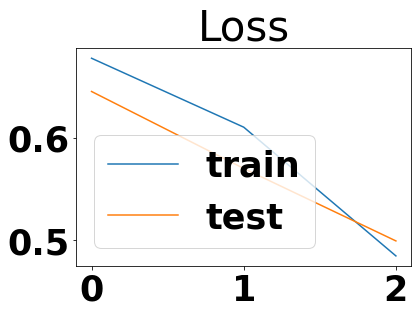

In [184]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

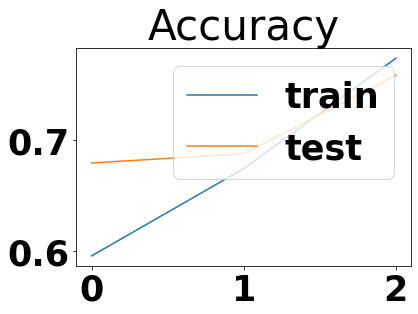

In [185]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();

In [186]:
#Tokenizing text data and Padding sequence
X = tokenizer.texts_to_sequences(unseen['review'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)
seq = tokenizer.texts_to_sequences(unseen['review'])
padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
pred_unseen = model.predict(padded)


Shape of data tensor: (1200, 500)


In [187]:
y_classes=pred_unseen.argmax(axis=-1)
y_classes

array([1, 0, 0, ..., 1, 0, 1])

In [188]:
#pd.DataFrame(y_classes).to_csv("lstm_output_0828_2.csv")

#### LSTM + CNN

In [189]:
def create_conv_model():
    model_conv = Sequential()
    model_conv.add(Embedding(20000, 100, input_length=500))
    model_conv.add(Dropout(0.1))
    model_conv.add(Conv1D(128, 5, activation='relu'))
    model_conv.add(MaxPooling1D(pool_size=4))
    model_conv.add(LSTM(100))
    model_conv.add(Dense(2, activation='softmax'))
    model_conv.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model_conv

In [190]:
model_conv = create_conv_model()
history = model_conv.fit(X_train, Y_train, validation_split=0.1, epochs = 5, batch_size = 128)

accr1 = model_conv.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr1[0],accr1[1]))

Epoch 1/5
17/17 [==============================] - 26s 1s/step - loss: 0.6579 - accuracy: 0.6148 - val_loss: 0.6178 - val_accuracy: 0.6667
Epoch 2/5
17/17 [==============================] - 21s 1s/step - loss: 0.5934 - accuracy: 0.6838 - val_loss: 0.5593 - val_accuracy: 0.7083
Epoch 3/5
17/17 [==============================] - 21s 1s/step - loss: 0.4490 - accuracy: 0.7880 - val_loss: 0.4800 - val_accuracy: 0.7833
Epoch 4/5
17/17 [==============================] - 21s 1s/step - loss: 0.2717 - accuracy: 0.8861 - val_loss: 0.4892 - val_accuracy: 0.8208
Epoch 5/5
19/19 [==============================] - 2s 97ms/step - loss: 0.4754 - accuracy: 0.8183
Test set
  Loss: 0.475
  Accuracy: 0.818


In [191]:
pred_conv = model_conv.predict(padded)

In [192]:
y_classes_conv=pred_conv.argmax(axis=-1)
y_classes_conv

array([1, 0, 0, ..., 1, 0, 1])

In [193]:
#pd.DataFrame(y_classes_conv).to_csv("conv_output_0828_1.csv")

# <font color='yellow'> The Result
In ML, Linear SVC Performed well, with below mentioned hyper parameters.
In Deep Learning Models, CNN + LSTM performed well.

<img src='PHD_Batch62_2847_Scores.png'>